In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

import regex as re


In [3]:
df_sentences = pd.read_pickle(r'full_new.csv')

In [16]:
df_sentences

,question_code,sentence,polarity_annotation,emotion_annotation,narrative_form,periodical_name,sentiment_pysentimiento,emotion_pysentimiento,nf_sentiment_lexicon_dispecs,nf_sentiment_lexicon_computational,nf_sentiment_lexicon_corrected,lexicon_emotion,manual_lexicon_sent_score,comp_lexicon_sent_score,corr_lexicon_sent_score,sentiment_py,emotion_py
0,G00Q136,"Miralos sin humanidad, y como esclavos, y ello...",NEG,no_agreement,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.887,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.000000,0.000000,0.000000,joy,NEU,NEU,NEU,NEG,anger
1,G00Q137,"Miralos sin humanidad, y como esclavos, y ello...",NEG,no_agreement,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.887,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.000000,0.000000,0.000000,joy,NEU,NEU,NEU,NEG,anger
2,G00Q138,No es tan facil determinar por dónde se ha de ...,NEU,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.585,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,others,POS,POS,POS,NEG,others
3,G00Q139,"Tù debes acordarte de la ternura, con que se p...",POS,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.804,...","AnalyzerOutput(output=joy, probas={joy: 0.552,...",1.000000,1.000000,1.000000,joy,POS,POS,POS,POS,joy
4,G00Q140,"Alli estarà mas tranquilo, y podrà vivir à su ...",POS,no_agreement,D,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.672,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,joy,POS,POS,POS,POS,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,G01Q58,Tiene un gabinete muy primoroso donde se retir...,no_agreement,no emotion,EX,1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-0...,"AnalyzerOutput(output=POS, probas={POS: 0.836,...","AnalyzerOutput(output=others, probas={others: ...",0.000000,0.000000,0.000000,others,NEU,NEU,NEU,POS,others
235,G01Q70,"Pero en obsequio de la verdad debo decir, que ...",no_agreement,no emotion,MT,1803_El-Regañón-general_Anónimo-(Ventura-Ferr...,"AnalyzerOutput(output=NEU, probas={NEU: 0.626,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,sadness,POS,POS,POS,NEU,others
236,G01Q28,"Apostaré algo de bueno, à que algun artificio ...",no_agreement,no emotion,S,1781_El-Censor_Anonym-(García-de-Cañuelo-Luis+...,"AnalyzerOutput(output=NEG, probas={NEG: 0.722,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.600000,0.666667,0.600000,sadness,POS,POS,POS,NEG,anger
237,G00Q73,Mi amiga me ha dicho que Vm. no gusta de las M...,no_agreement,no emotion,LB,1786-1788_El-Corresponsal-del-Censor_Anónimo_V...,"AnalyzerOutput(output=NEG, probas={NEG: 0.653,...","AnalyzerOutput(output=sadness, probas={sadness...",0.333333,0.333333,0.333333,anger,POS,POS,POS,NEG,sadness


In [17]:
df_sentences['narrative_form'].value_counts()

LB          46
FP          39
D           26
EX          26
SP          23
MT          22
S           18
TR          13
F            7
LB+FP        3
??           2
?            2
EX+F         1
EX+SP        1
LB+SP+EX     1
SP+EX        1
S+D          1
L            1
S+LB         1
AL           1
P            1
SP, LB       1
LB+D         1
Name: narrative_form, dtype: int64

# Sentiment lexicon dispecs

In [7]:
print((df.groupby('narrative_form')['nf_sentiment_lexicon_dispecs'].describe()))

                count      mean       std       min       25%       50%  \
narrative_form                                                            
?                 1.0  1.000000       NaN  1.000000  1.000000  1.000000   
??                2.0  0.000000  0.000000  0.000000  0.000000  0.000000   
AL                1.0  1.000000       NaN  1.000000  1.000000  1.000000   
D                28.0  0.270238  0.736376 -1.000000  0.000000  0.333333   
EX               36.0  0.246429  0.685050 -1.000000 -0.333333  0.100000   
EX+F              3.0 -0.095238  0.082479 -0.142857 -0.142857 -0.142857   
EX+SP             1.0  0.142857       NaN  0.142857  0.142857  0.142857   
F                 8.0  0.000000  0.925820 -1.000000 -1.000000  0.000000   
FP               47.0  0.012259  0.703874 -1.000000 -0.416667  0.000000   
L                 1.0  0.000000       NaN  0.000000  0.000000  0.000000   
LB               49.0  0.065646  0.688179 -1.000000 -0.333333  0.000000   
LB+D              1.0  0.

In [11]:
sns.set(rc={'figure.figsize':(50,25)})

In [12]:
attribute = "periodical_name"

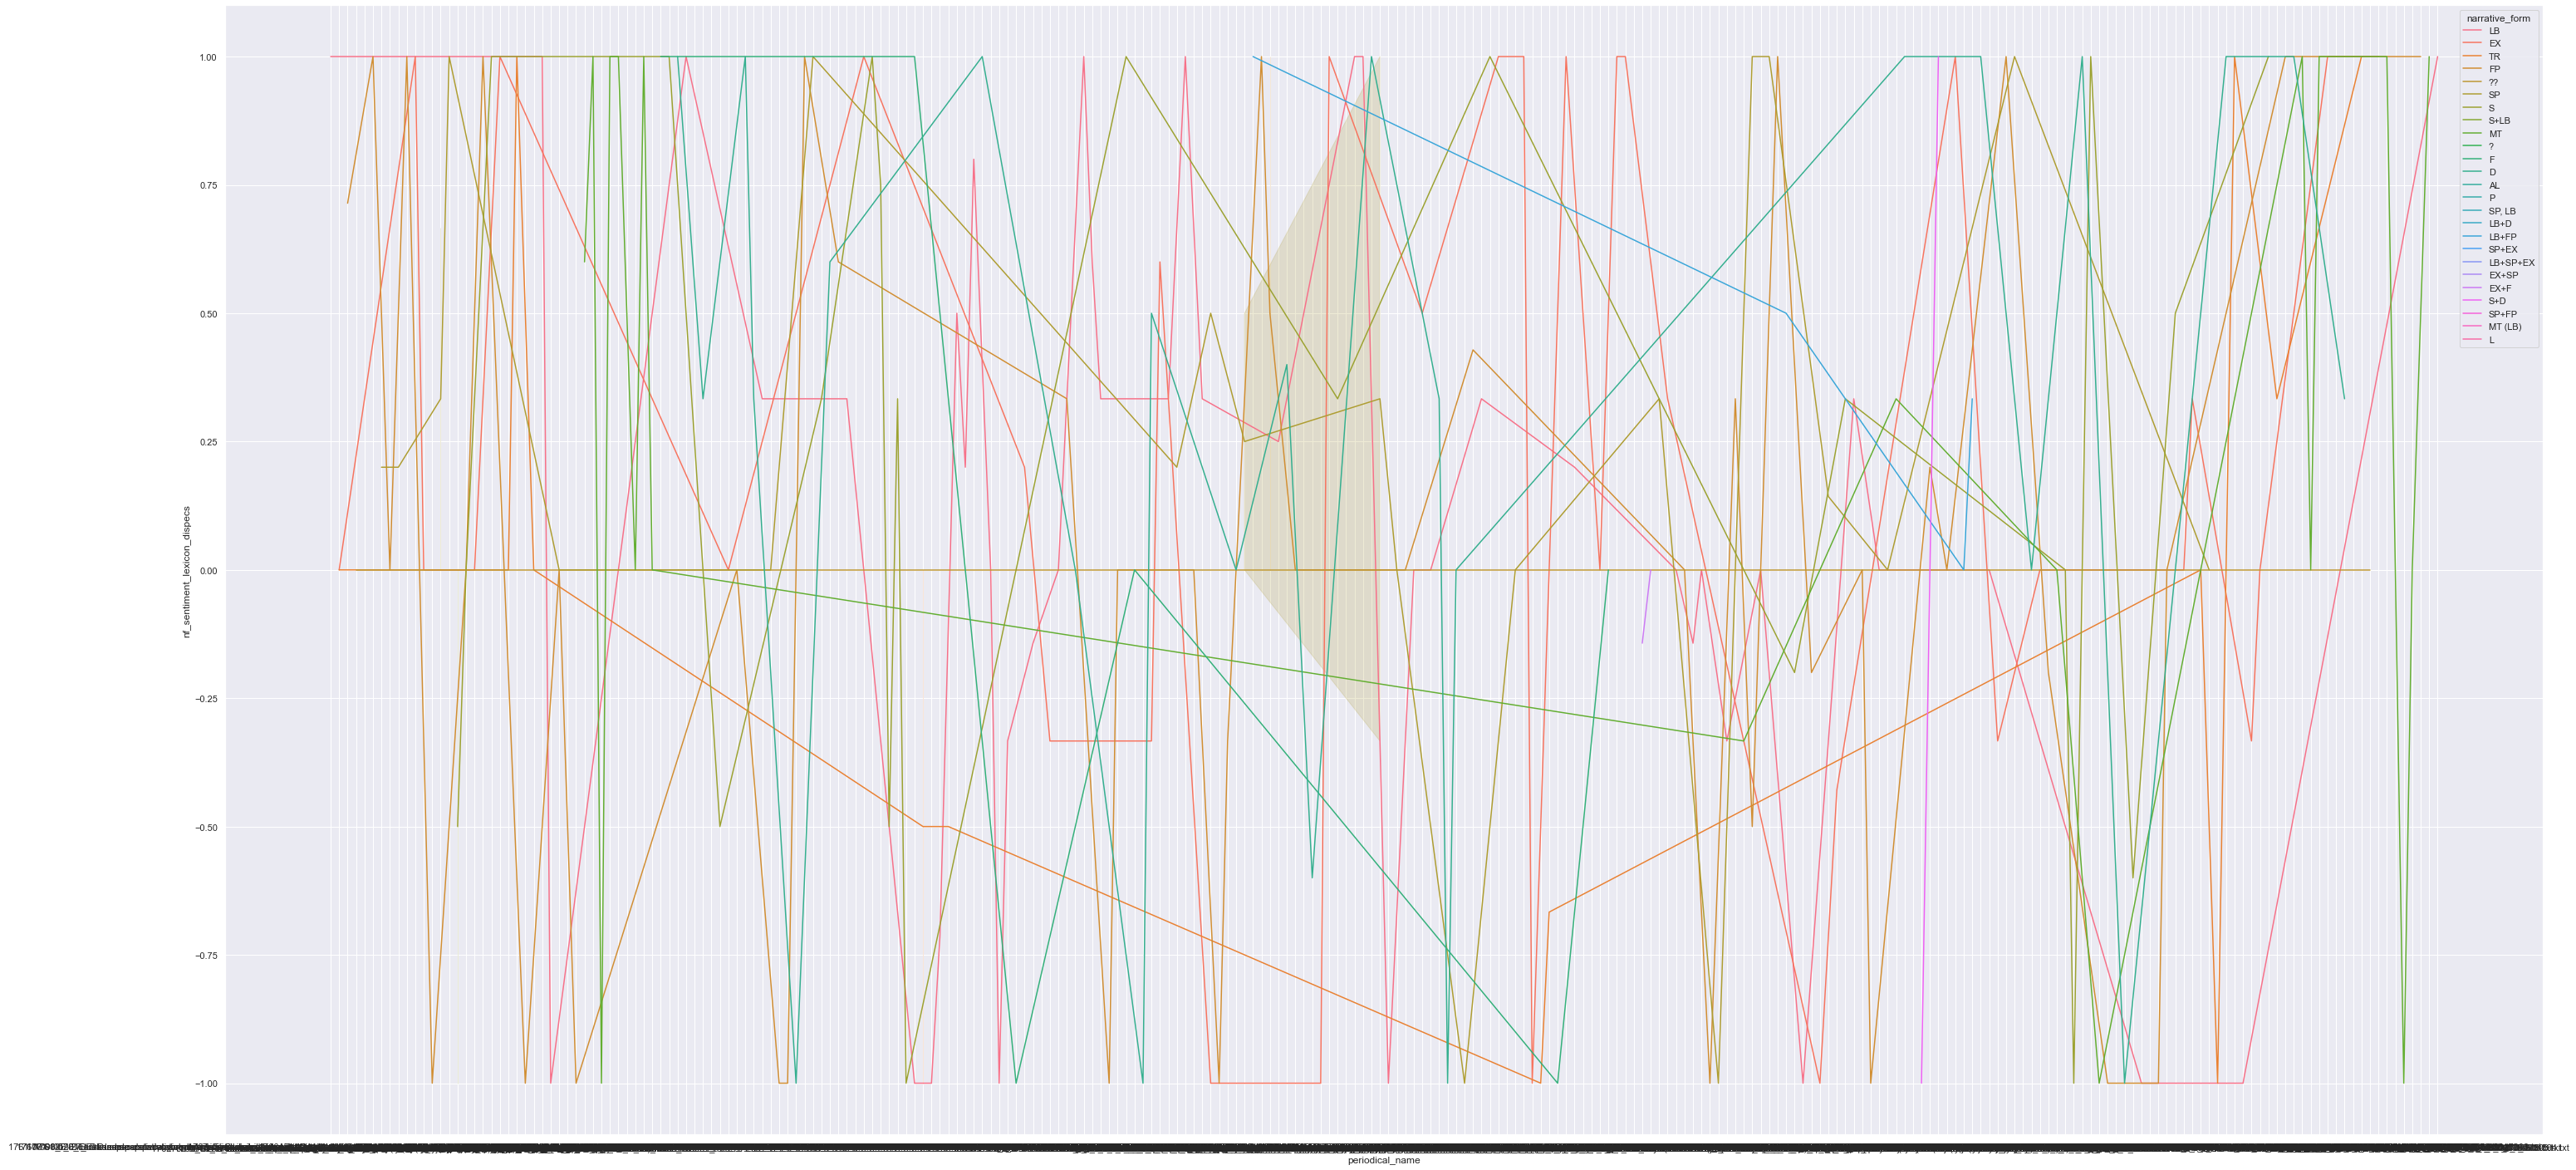

In [13]:
line = sns.lineplot(data=df, x=attribute, y="nf_sentiment_lexicon_dispecs", hue="narrative_form")
fig = line.get_figure()
fig.savefig("results/plots/spanish/sentences/manual_lexicon_lineplot.png")

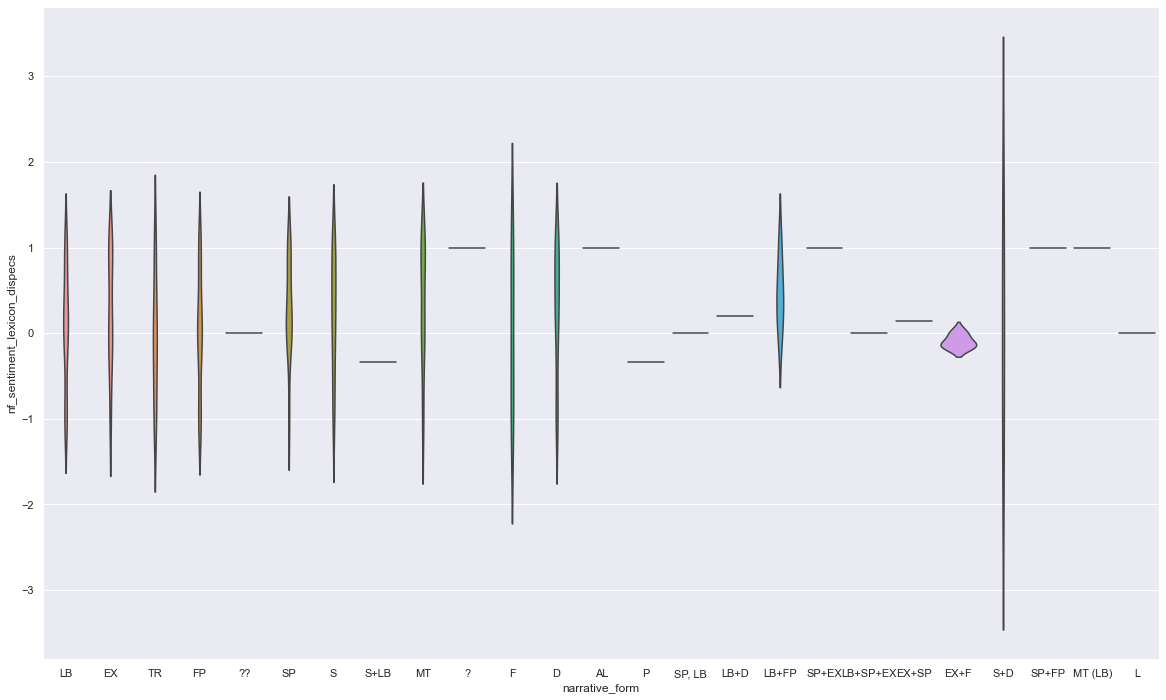

In [14]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20,12)


violin1 = sns.violinplot(x="narrative_form", y="nf_sentiment_lexicon_dispecs", kind="violin", inner=None, data=df, ax=ax)

fig = violin1.get_figure()
fig.savefig("results/plots/spanish/sentences/manual_lexicon_violin.png")



## Manual annotations

In [37]:
sns.set(font_scale=3)


In [19]:
df_sentences

,question_code,sentence,polarity_annotation,emotion_annotation,narrative_form,periodical_name,sentiment_pysentimiento,emotion_pysentimiento,nf_sentiment_lexicon_dispecs,nf_sentiment_lexicon_computational,nf_sentiment_lexicon_corrected,lexicon_emotion,manual_lexicon_sent_score,comp_lexicon_sent_score,corr_lexicon_sent_score,sentiment_py,emotion_py
0,G00Q136,"Miralos sin humanidad, y como esclavos, y ello...",NEG,no_agreement,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.887,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.000000,0.000000,0.000000,joy,NEU,NEU,NEU,NEG,anger
1,G00Q137,"Miralos sin humanidad, y como esclavos, y ello...",NEG,no_agreement,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.887,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.000000,0.000000,0.000000,joy,NEU,NEU,NEU,NEG,anger
2,G00Q138,No es tan facil determinar por dónde se ha de ...,NEU,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.585,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,others,POS,POS,POS,NEG,others
3,G00Q139,"Tù debes acordarte de la ternura, con que se p...",POS,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.804,...","AnalyzerOutput(output=joy, probas={joy: 0.552,...",1.000000,1.000000,1.000000,joy,POS,POS,POS,POS,joy
4,G00Q140,"Alli estarà mas tranquilo, y podrà vivir à su ...",POS,no_agreement,D,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.672,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,joy,POS,POS,POS,POS,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,G01Q58,Tiene un gabinete muy primoroso donde se retir...,no_agreement,no emotion,EX,1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-0...,"AnalyzerOutput(output=POS, probas={POS: 0.836,...","AnalyzerOutput(output=others, probas={others: ...",0.000000,0.000000,0.000000,others,NEU,NEU,NEU,POS,others
235,G01Q70,"Pero en obsequio de la verdad debo decir, que ...",no_agreement,no emotion,MT,1803_El-Regañón-general_Anónimo-(Ventura-Ferr...,"AnalyzerOutput(output=NEU, probas={NEU: 0.626,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,sadness,POS,POS,POS,NEU,others
236,G01Q28,"Apostaré algo de bueno, à que algun artificio ...",no_agreement,no emotion,S,1781_El-Censor_Anonym-(García-de-Cañuelo-Luis+...,"AnalyzerOutput(output=NEG, probas={NEG: 0.722,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.600000,0.666667,0.600000,sadness,POS,POS,POS,NEG,anger
237,G00Q73,Mi amiga me ha dicho que Vm. no gusta de las M...,no_agreement,no emotion,LB,1786-1788_El-Corresponsal-del-Censor_Anónimo_V...,"AnalyzerOutput(output=NEG, probas={NEG: 0.653,...","AnalyzerOutput(output=sadness, probas={sadness...",0.333333,0.333333,0.333333,anger,POS,POS,POS,NEG,sadness


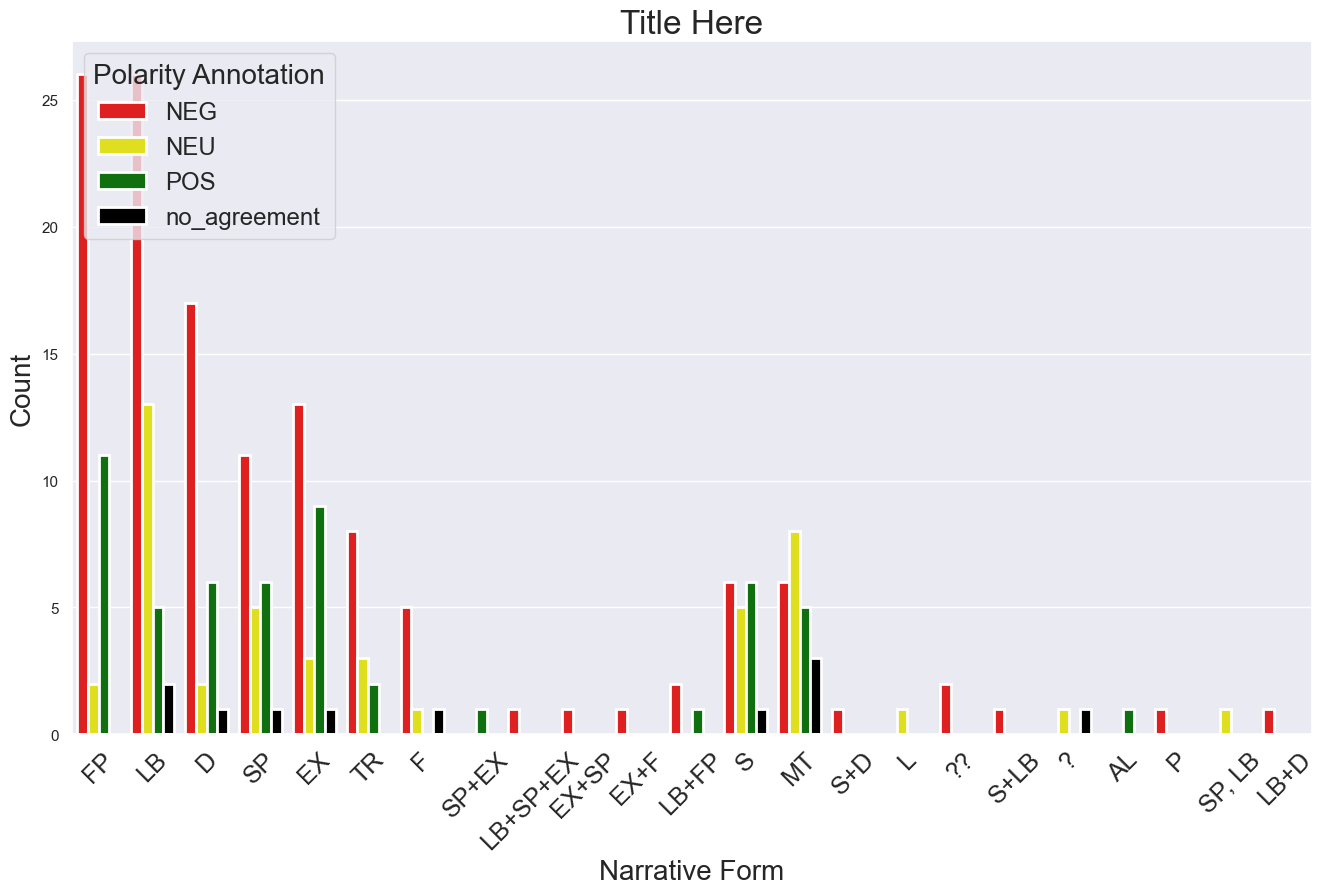

In [28]:

colors = {'POS':'green', 'NEU':'yellow', 'NEG':'red', 'no_agreement':'black'}

# Set the figure size to 16:9 aspect ratio
plt.figure(figsize=(16, 9))

sent_Score1 = sns.countplot(x=df_sentences['narrative_form'], 
                            palette=colors, 
                            hue=df_sentences['polarity_annotation'],
                            linewidth=2)  # Thicker lines

# Rotate x-axis labels and increase their font size
sent_Score1.set_xticklabels(sent_Score1.get_xticklabels(), rotation=45, fontsize=18)

# Increase the font size of axis labels and title
sent_Score1.set_xlabel('Narrative Form', fontsize=20)
sent_Score1.set_ylabel('Count', fontsize=20)
sent_Score1.set_title('Title Here', fontsize=24)

# Increase the size of the legend
plt.legend(title='Polarity Annotation', fontsize='x-large', title_fontsize='20')

fig = sent_Score1.get_figure()
fig.savefig("gold.png")

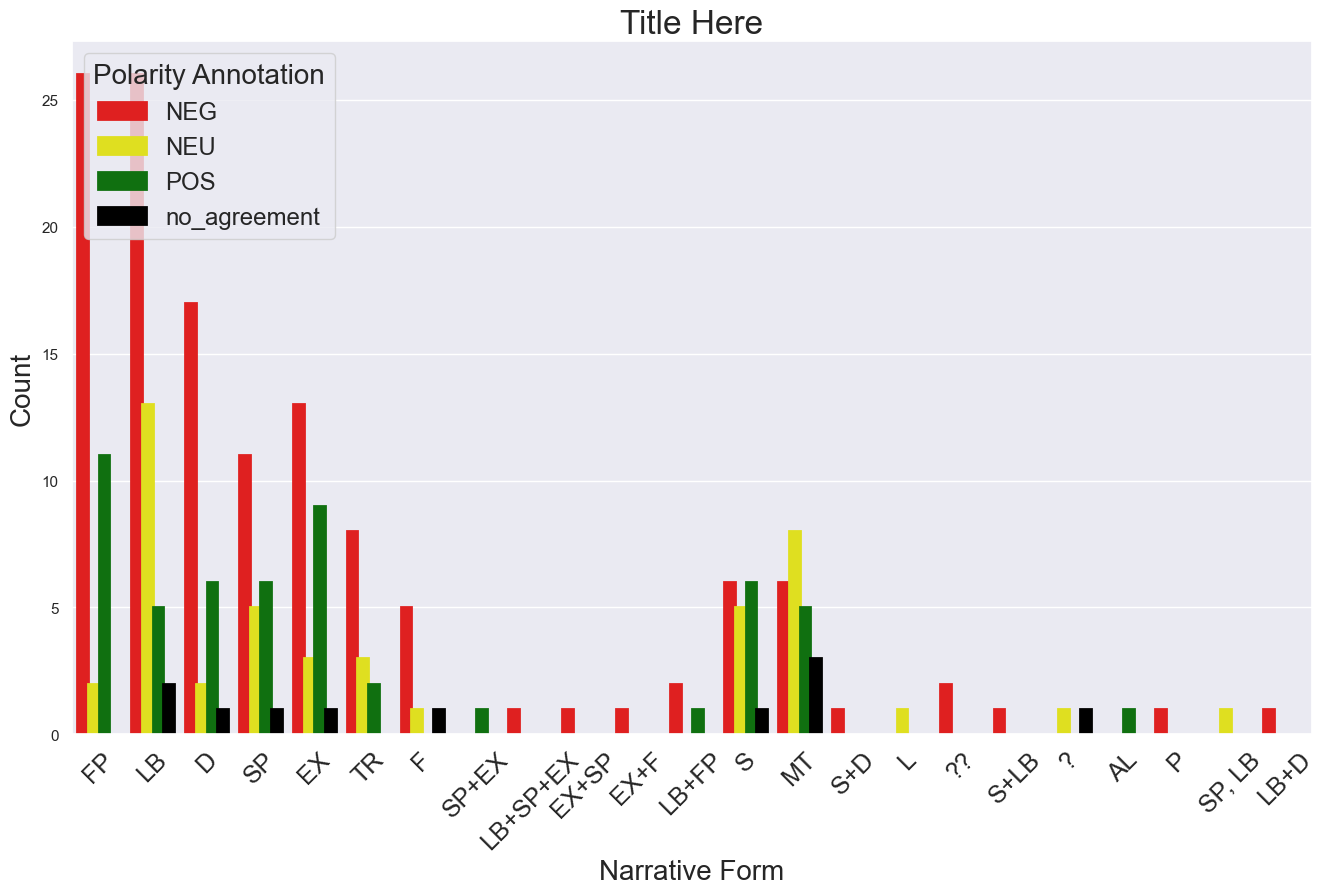

In [31]:
colors = {'POS':'green', 'NEU':'yellow', 'NEG':'red', 'no_agreement':'black'}

# Set the figure size to 16:9 aspect ratio
plt.figure(figsize=(16, 9))

sent_Score1 = sns.countplot(x=df_sentences['narrative_form'], 
                            palette=colors, 
                            hue=df_sentences['polarity_annotation'],
                            linewidth=2)

# Loop through bars and set edgecolor to be the same as facecolor
for patch in sent_Score1.patches:
    patch.set_edgecolor(patch.get_facecolor())

# Rotate x-axis labels and increase their font size
sent_Score1.set_xticklabels(sent_Score1.get_xticklabels(), rotation=45, fontsize=18)

# Increase the font size of axis labels and title
sent_Score1.set_xlabel('Narrative Form', fontsize=20)
sent_Score1.set_ylabel('Count', fontsize=20)
sent_Score1.set_title('Title Here', fontsize=24)

# Increase the size of the legend
plt.legend(title='Polarity Annotation', fontsize='x-large', title_fontsize='20')

fig = sent_Score1.get_figure()
fig.savefig("gold.png")



## Pysentimiento sentiment score

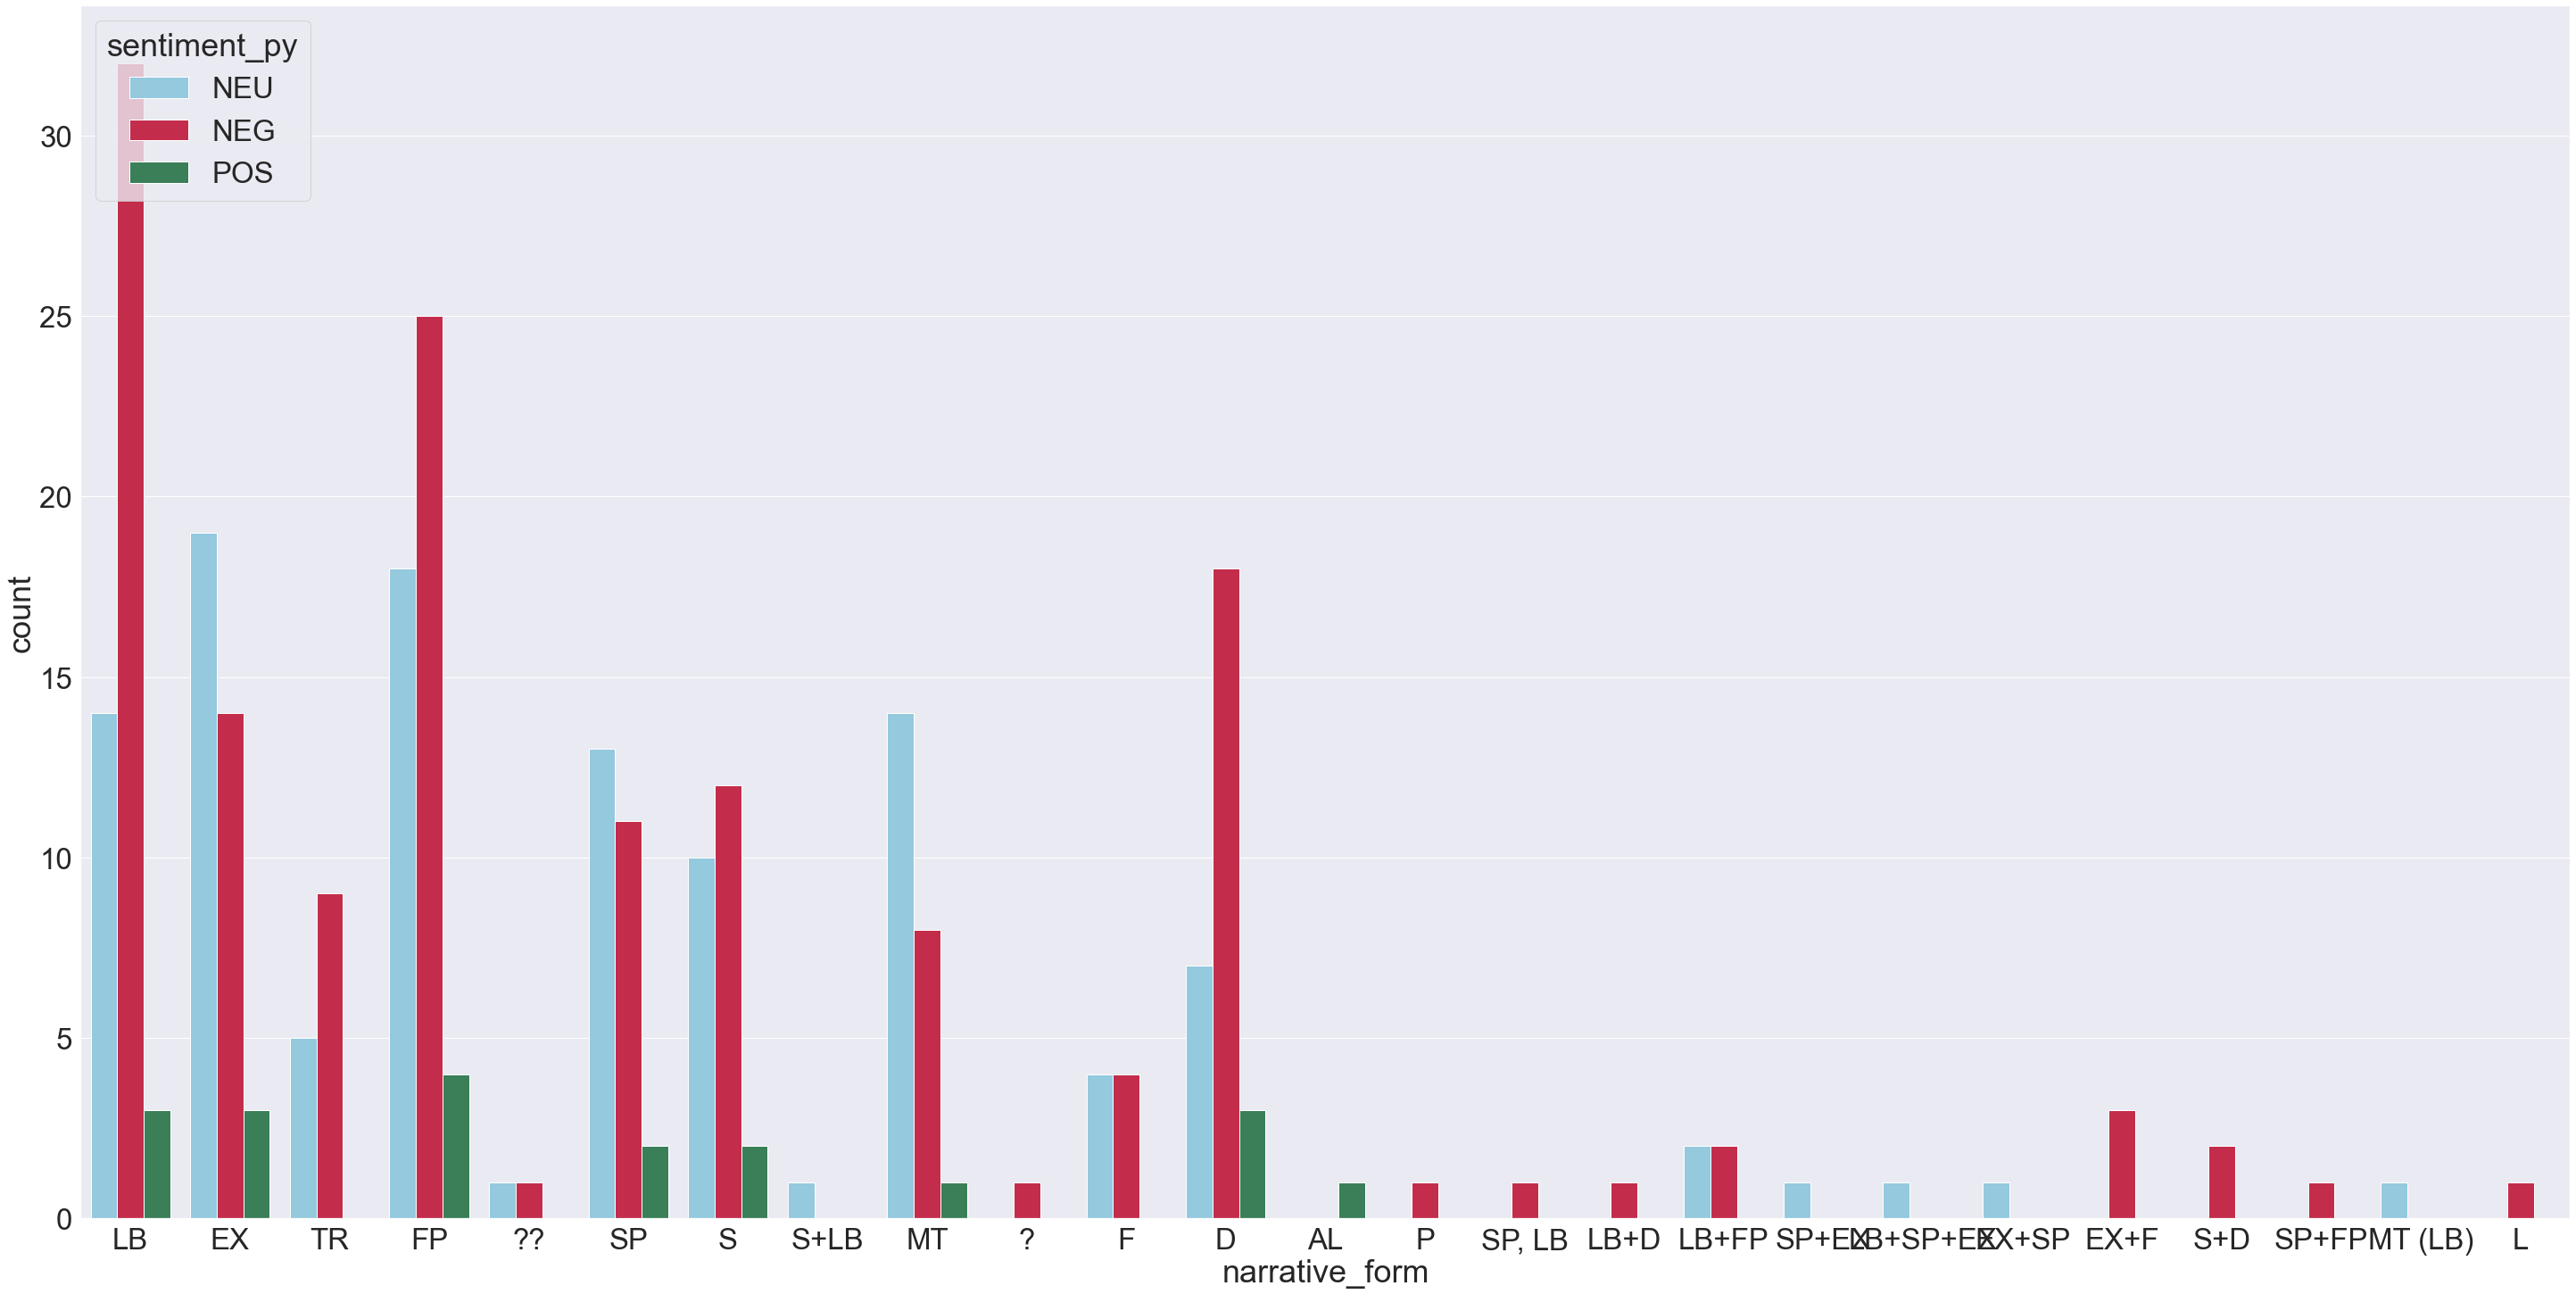

In [45]:
colors = {'POS':'seagreen', 'NEU':'skyblue', 'NEG':'crimson', 'no_agreement':'black'}
sent_Score1 = sns.countplot(x=df_sentences['narrative_form'], palette=colors,hue=df_sentences['sentiment_py'])
fig = sent_Score1.get_figure()
fig.savefig("results/plots/spanish/sentences/sentiment_py.png")

## Corrected lexicon sentiment score

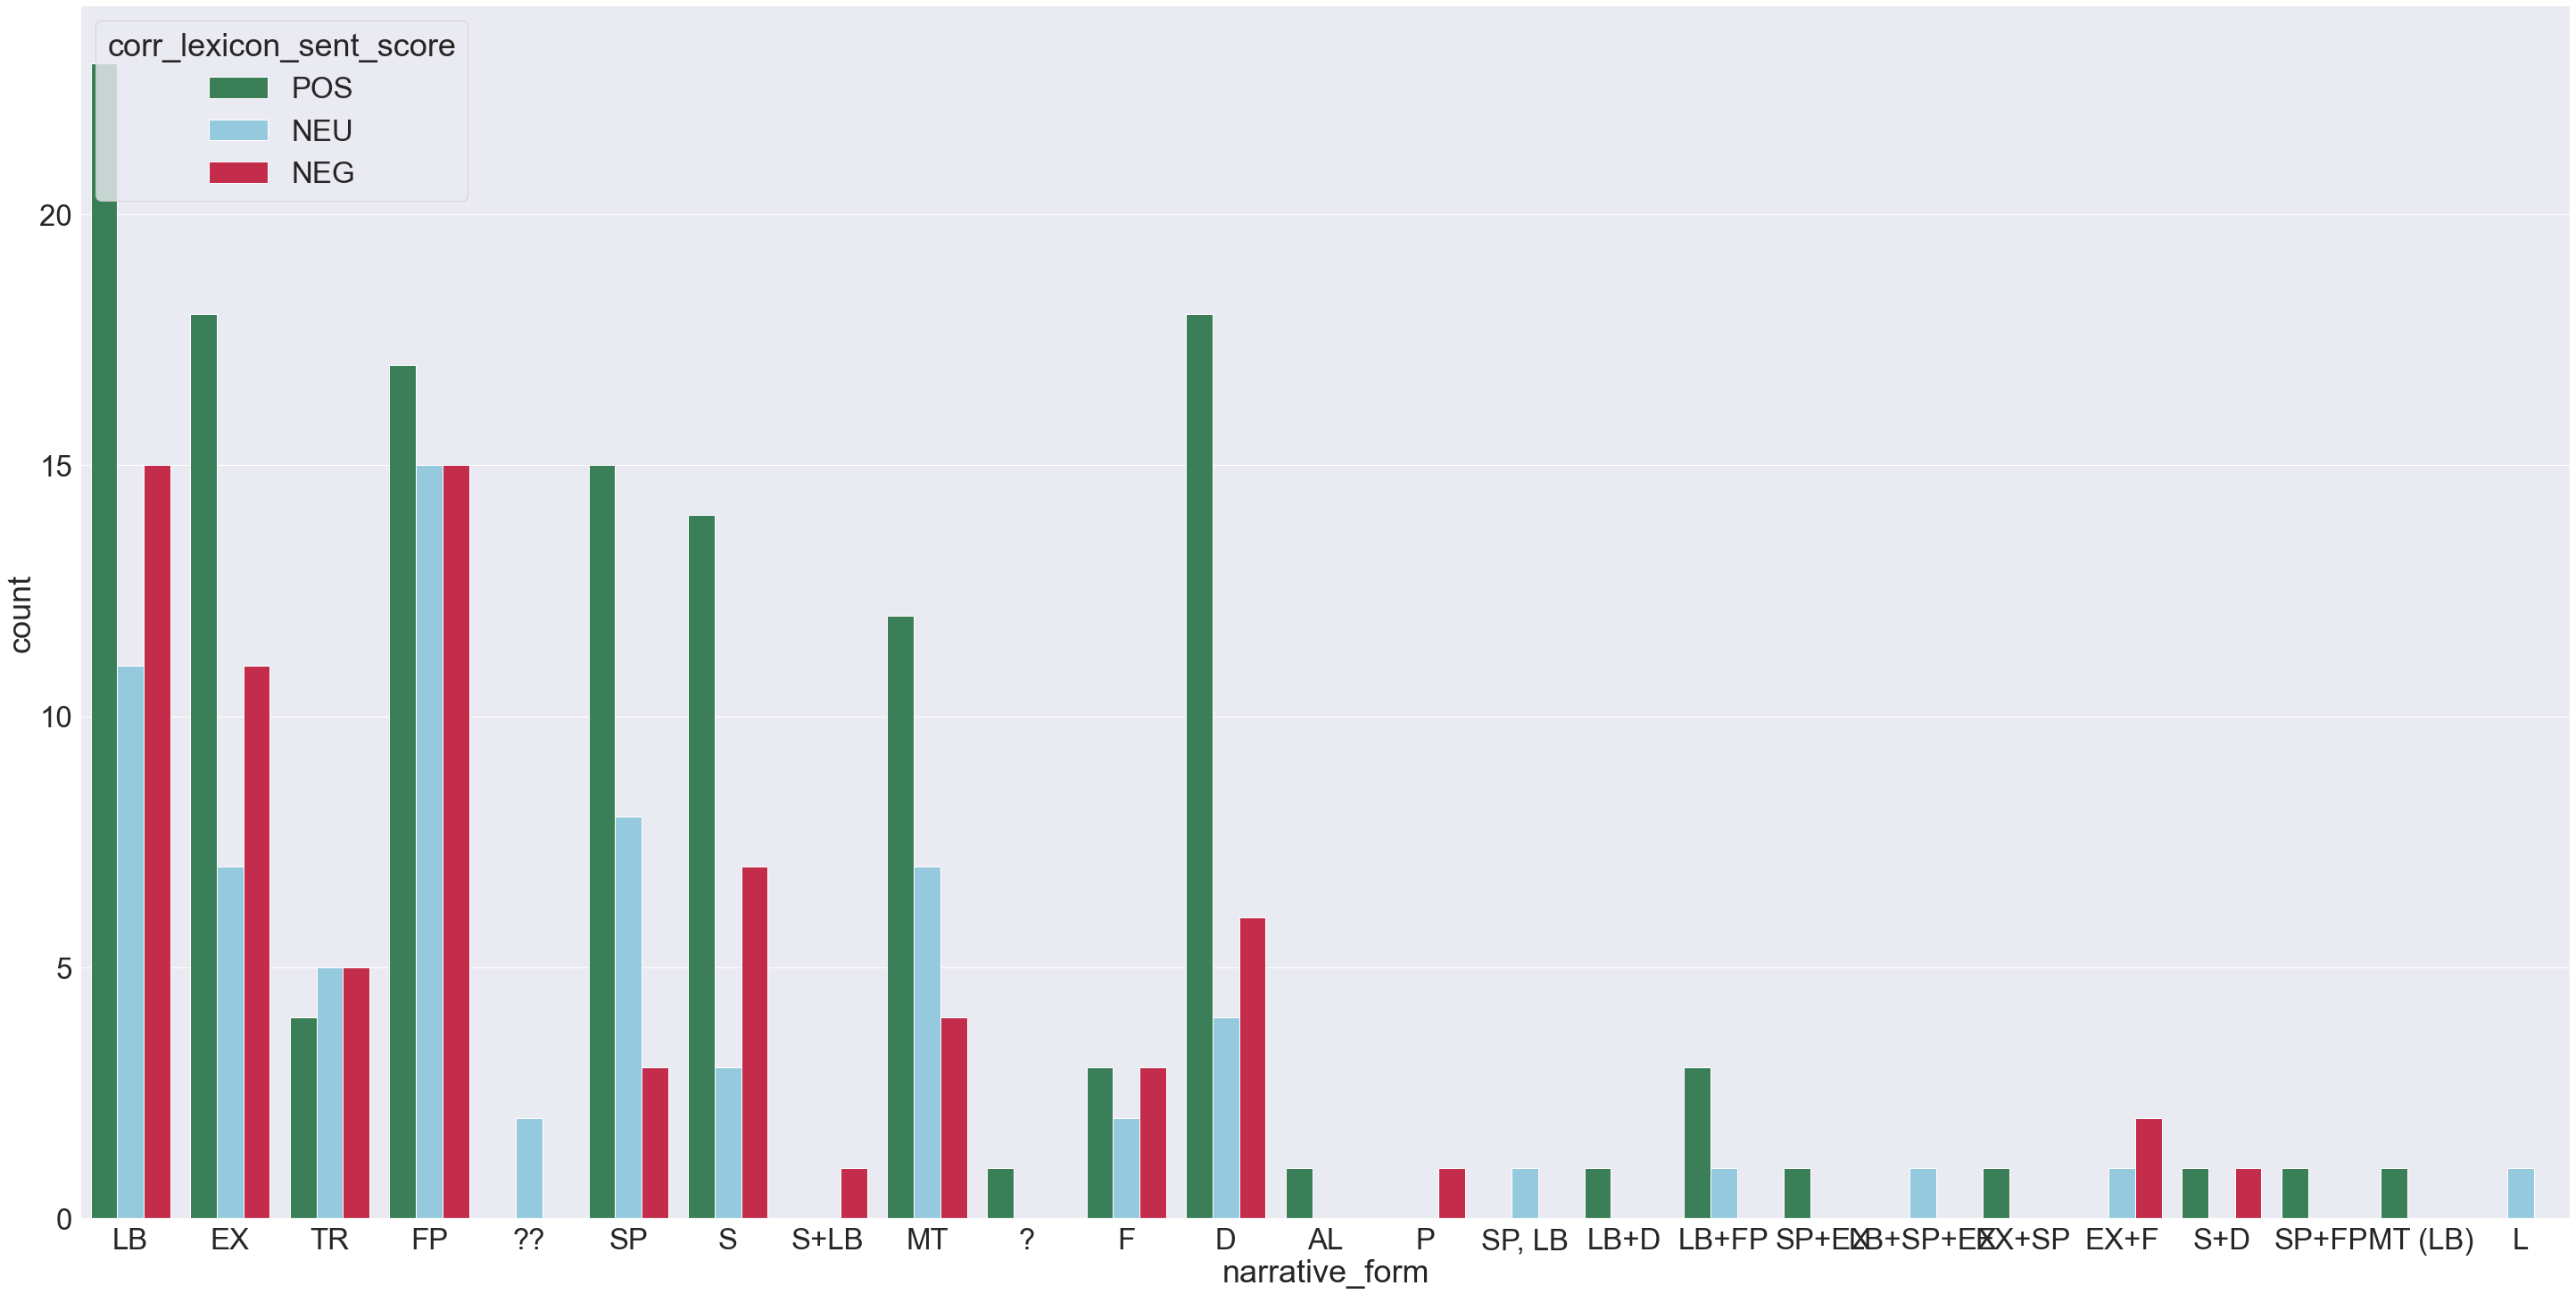

In [40]:
colors = {'POS':'seagreen', 'NEU':'skyblue', 'NEG':'crimson', 'no_agreement':'black'}
sent_Score1 = sns.countplot(x=df_sentences['narrative_form'], palette=colors,hue=df_sentences['corr_lexicon_sent_score'])
fig = sent_Score1.get_figure()
fontsize = 100


fig.savefig("results/plots/spanish/sentences/corr_lexicon_sent_score.png")


## Manual lexicon sentiment score

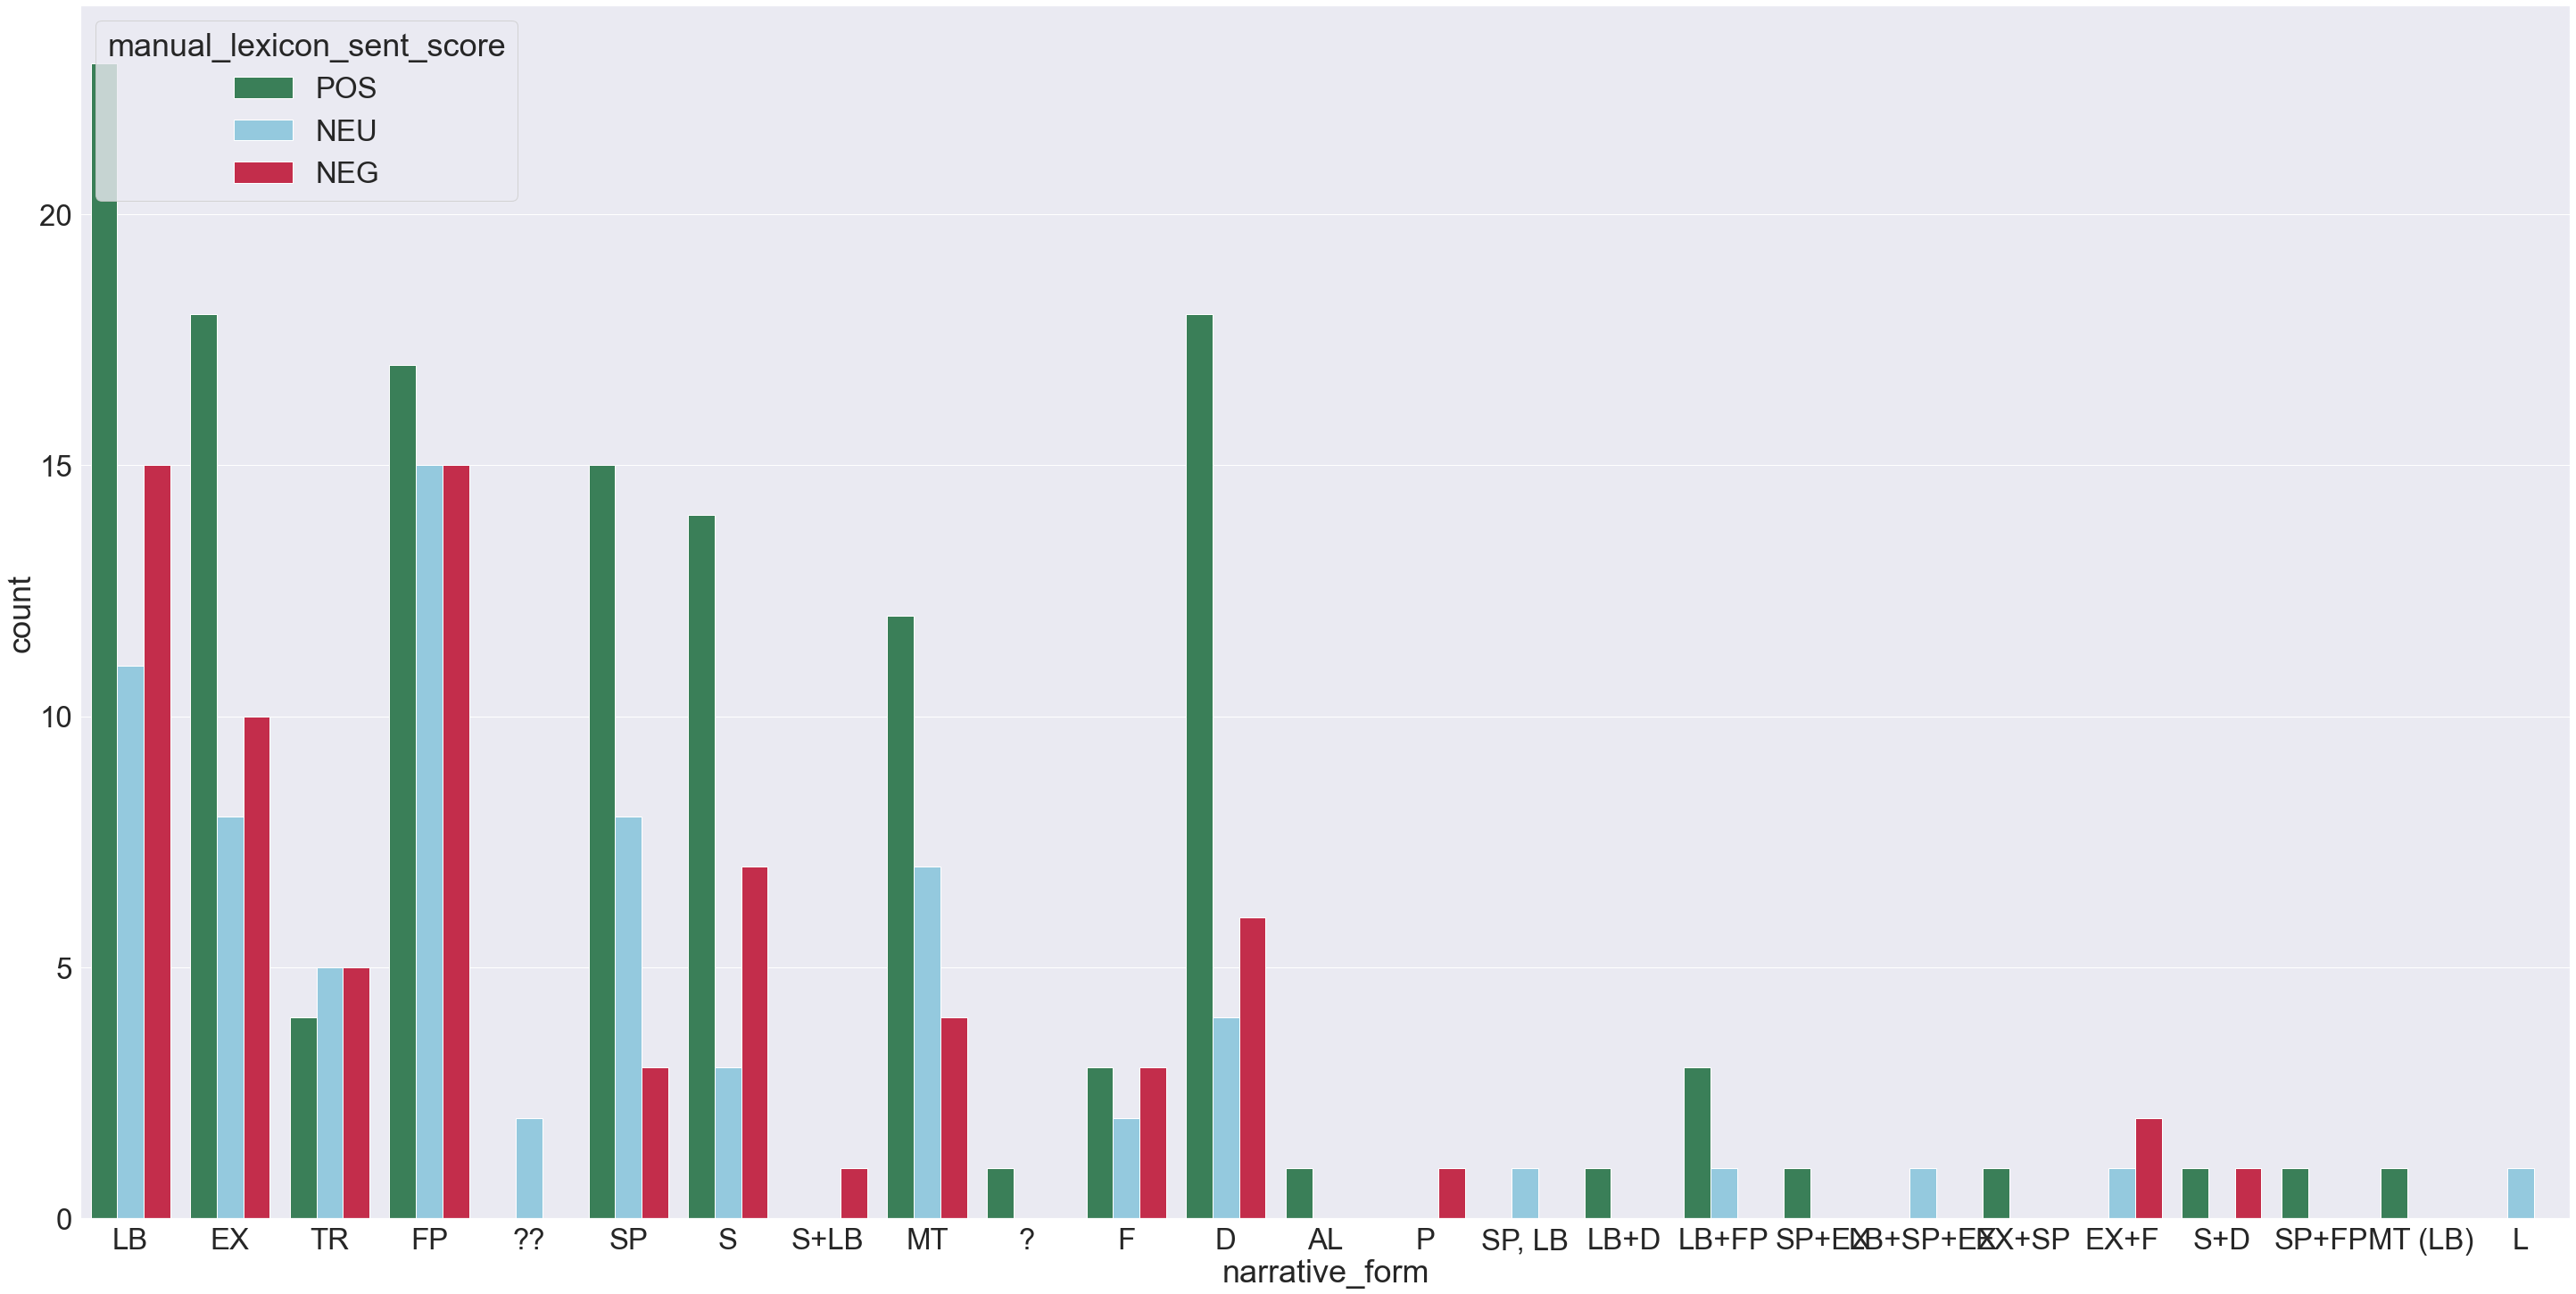

In [43]:
colors = {'POS':'seagreen', 'NEU':'skyblue', 'NEG':'crimson', 'no_agreement':'black'}
sent_Score1 = sns.countplot(x=df_sentences['narrative_form'], palette=colors,hue=df_sentences['manual_lexicon_sent_score'])
fig = sent_Score1.get_figure()
fig.savefig("results/plots/spanish/sentences/manual_lexicon_sent_score.png")

## Computational lexicon sentiment score

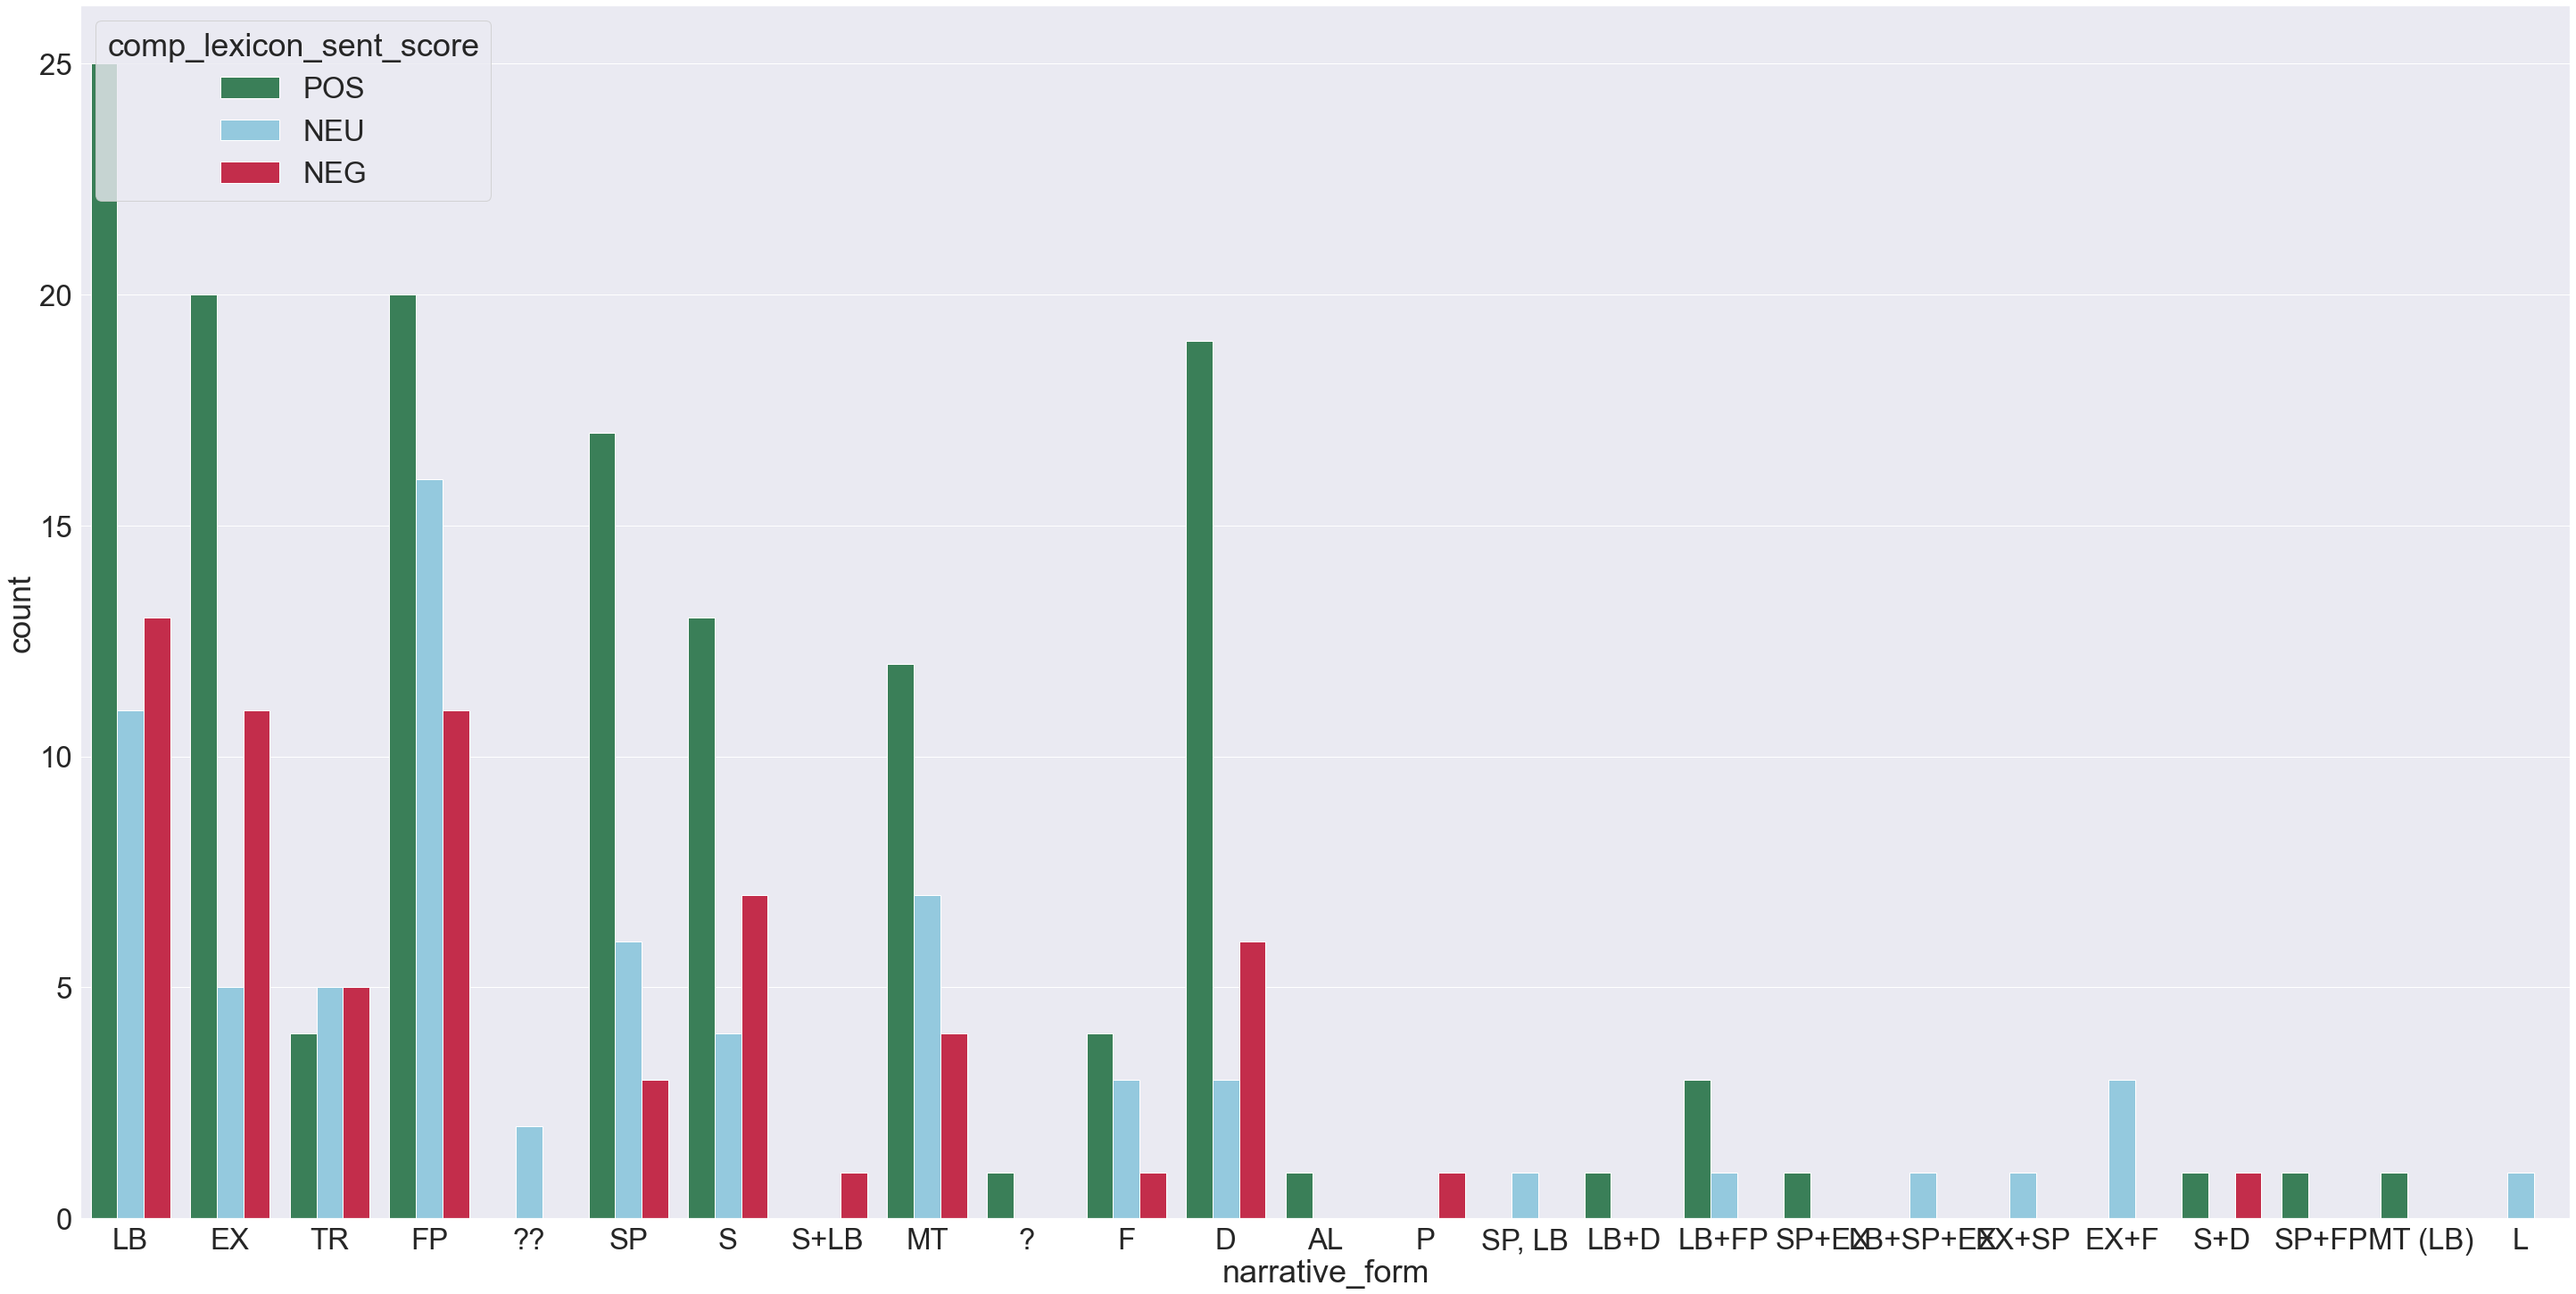

In [44]:
colors = {'POS':'seagreen', 'NEU':'skyblue', 'NEG':'crimson', 'no_agreement':'black'}
sent_Score1 = sns.countplot(x=df_sentences['narrative_form'], palette=colors,hue=df_sentences['comp_lexicon_sent_score'])
fig = sent_Score1.get_figure()
fig.savefig("results/plots/spanish/sentences/comp_lexicon_sent_score.png")

## Emotion annotation

In [51]:
df_sentences['emotion_annotation'] = df_sentences['emotion_annotation'].astype(str)


In [52]:
df_sentences['emotion_annotation'] = df_sentences['emotion_annotation'].str.strip()


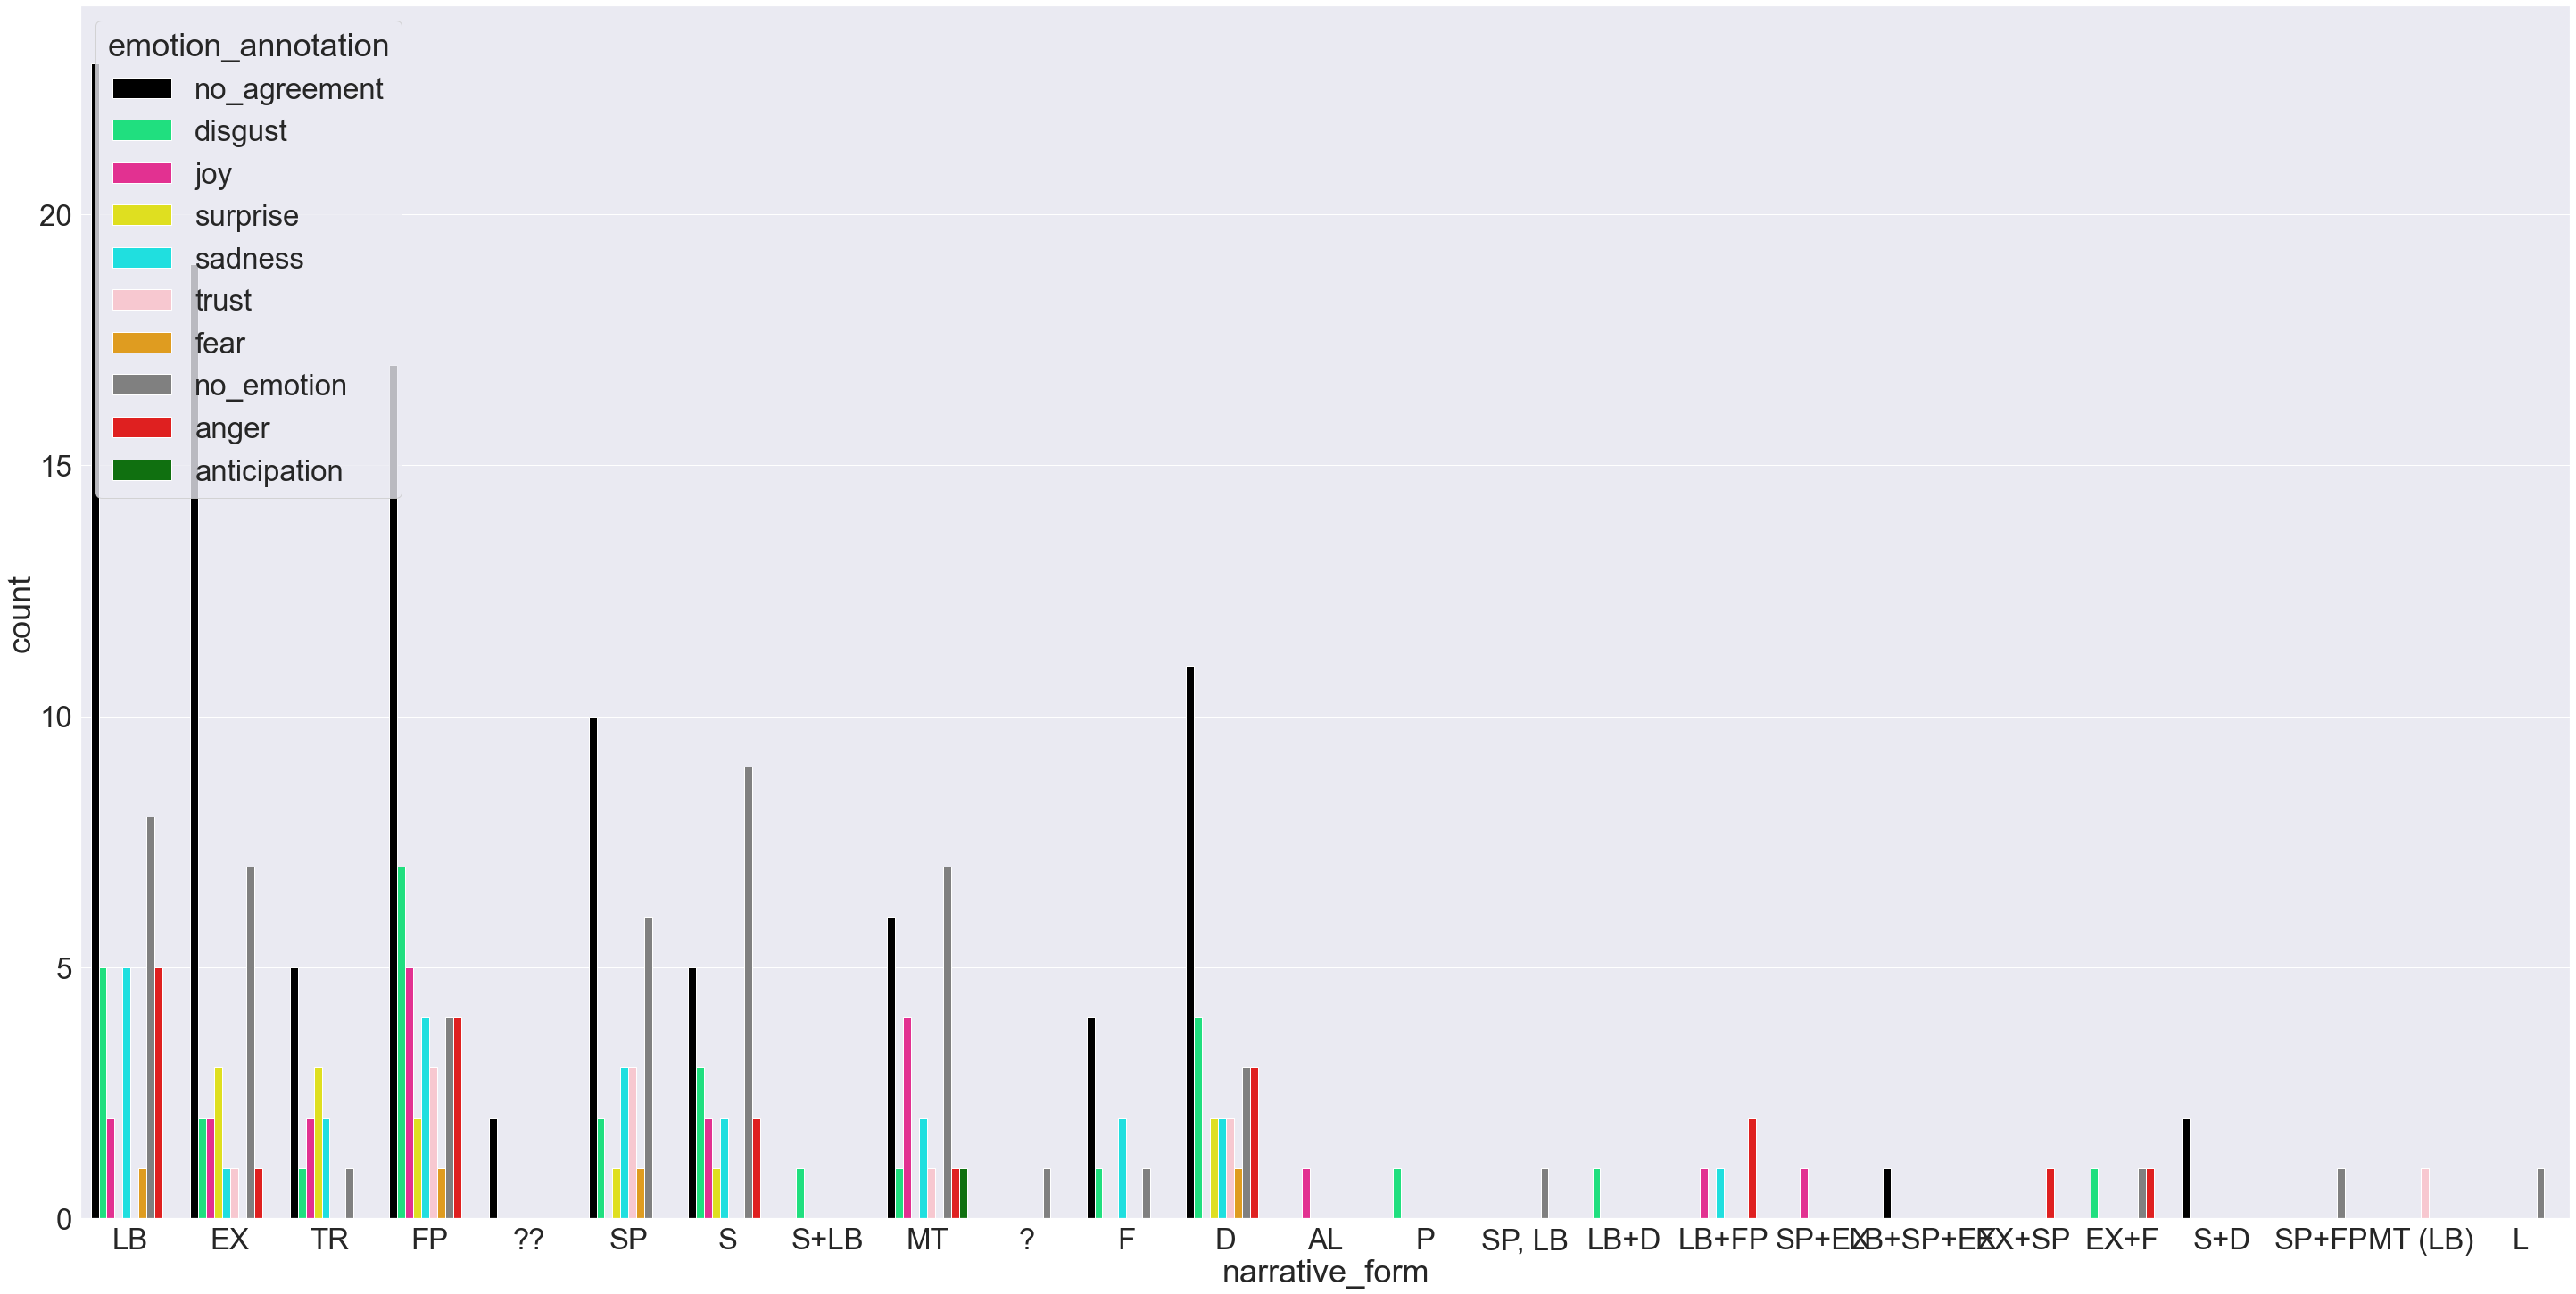

In [57]:
colors = {'joy':'deeppink', 'sadness':'aqua', 'disgust':'springgreen','anger':'red', 'fear':'orange', 'surprise':'yellow', 'others':'indigo','no_agreement':'black','trust':'pink', 'anticipation':'green', 'no_emotion':'grey'}

lexicon_emotion_score = sns.countplot(x='narrative_form',data=df_sentences, palette=colors,hue='emotion_annotation')
fig = lexicon_emotion_score.get_figure()
fig.savefig("results/plots/spanish/emotion_annotation.png")


 ## Emotion pysentimiento

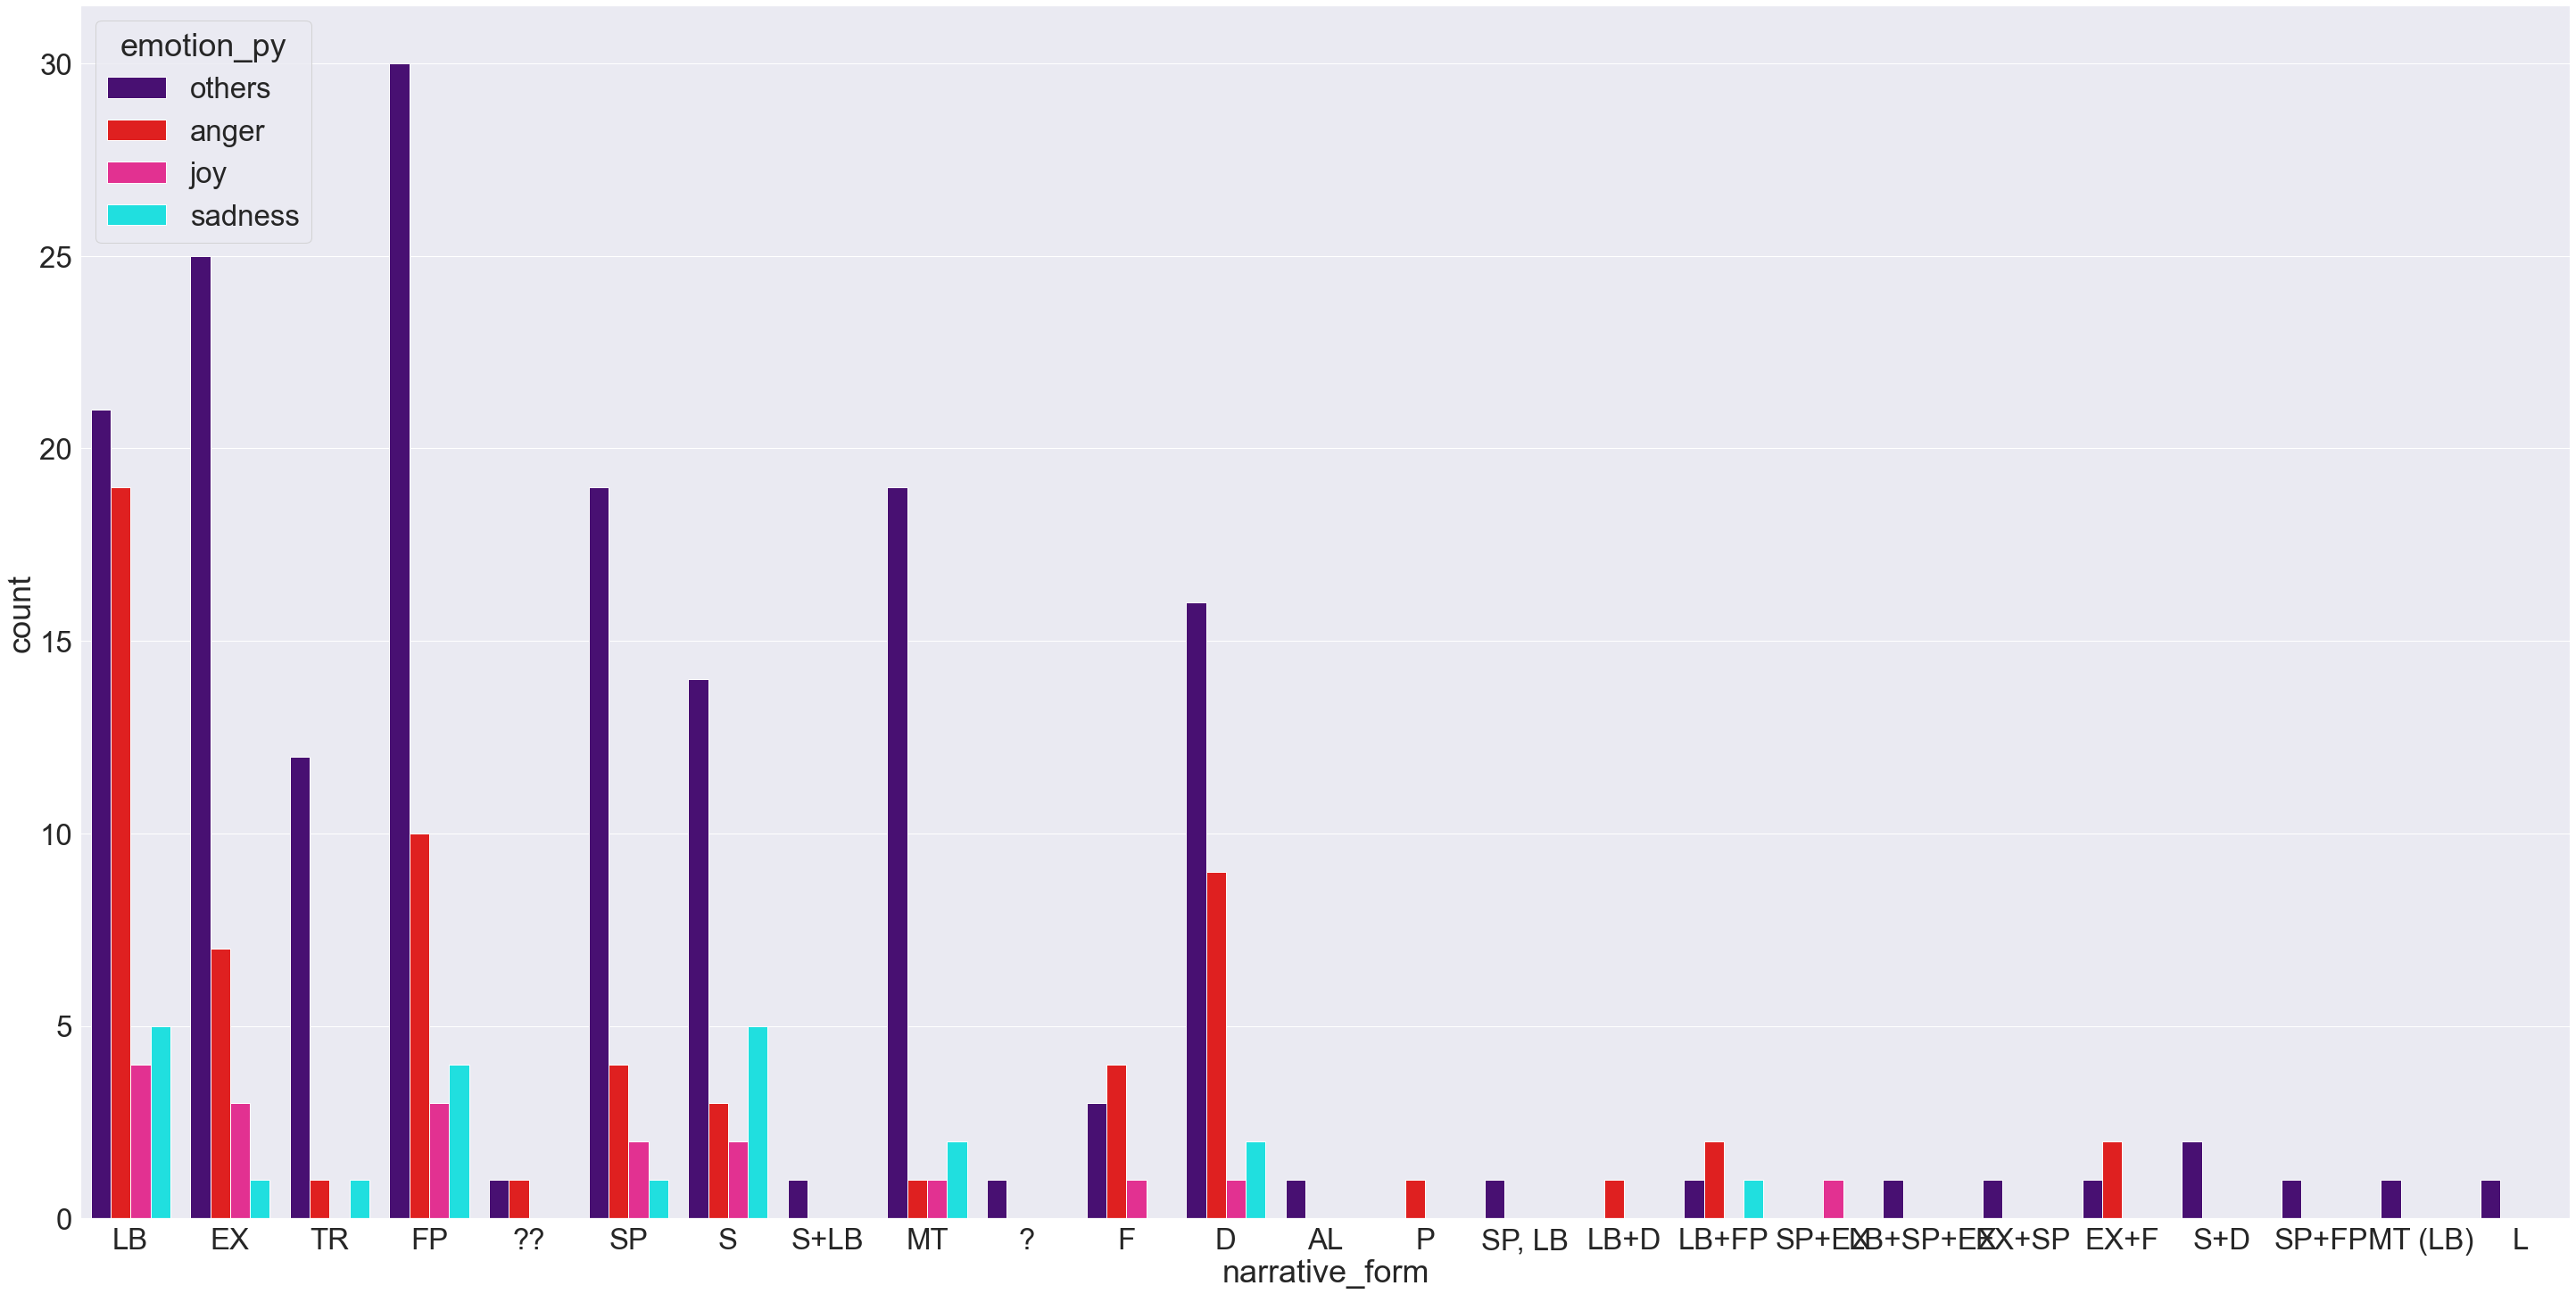

In [58]:
colors = {'joy':'deeppink', 'sadness':'aqua', 'disgust':'springgreen','anger':'red', 'fear':'orange', 'surprise':'yellow', 'others':'indigo'}

lexicon_emotion_score = sns.countplot(x='narrative_form',data=df, palette=colors,hue='emotion_py')
fig = lexicon_emotion_score.get_figure()
fig.savefig("results/plots/spanish/pysentimiento_emotion.png")


## Emotion lexicon

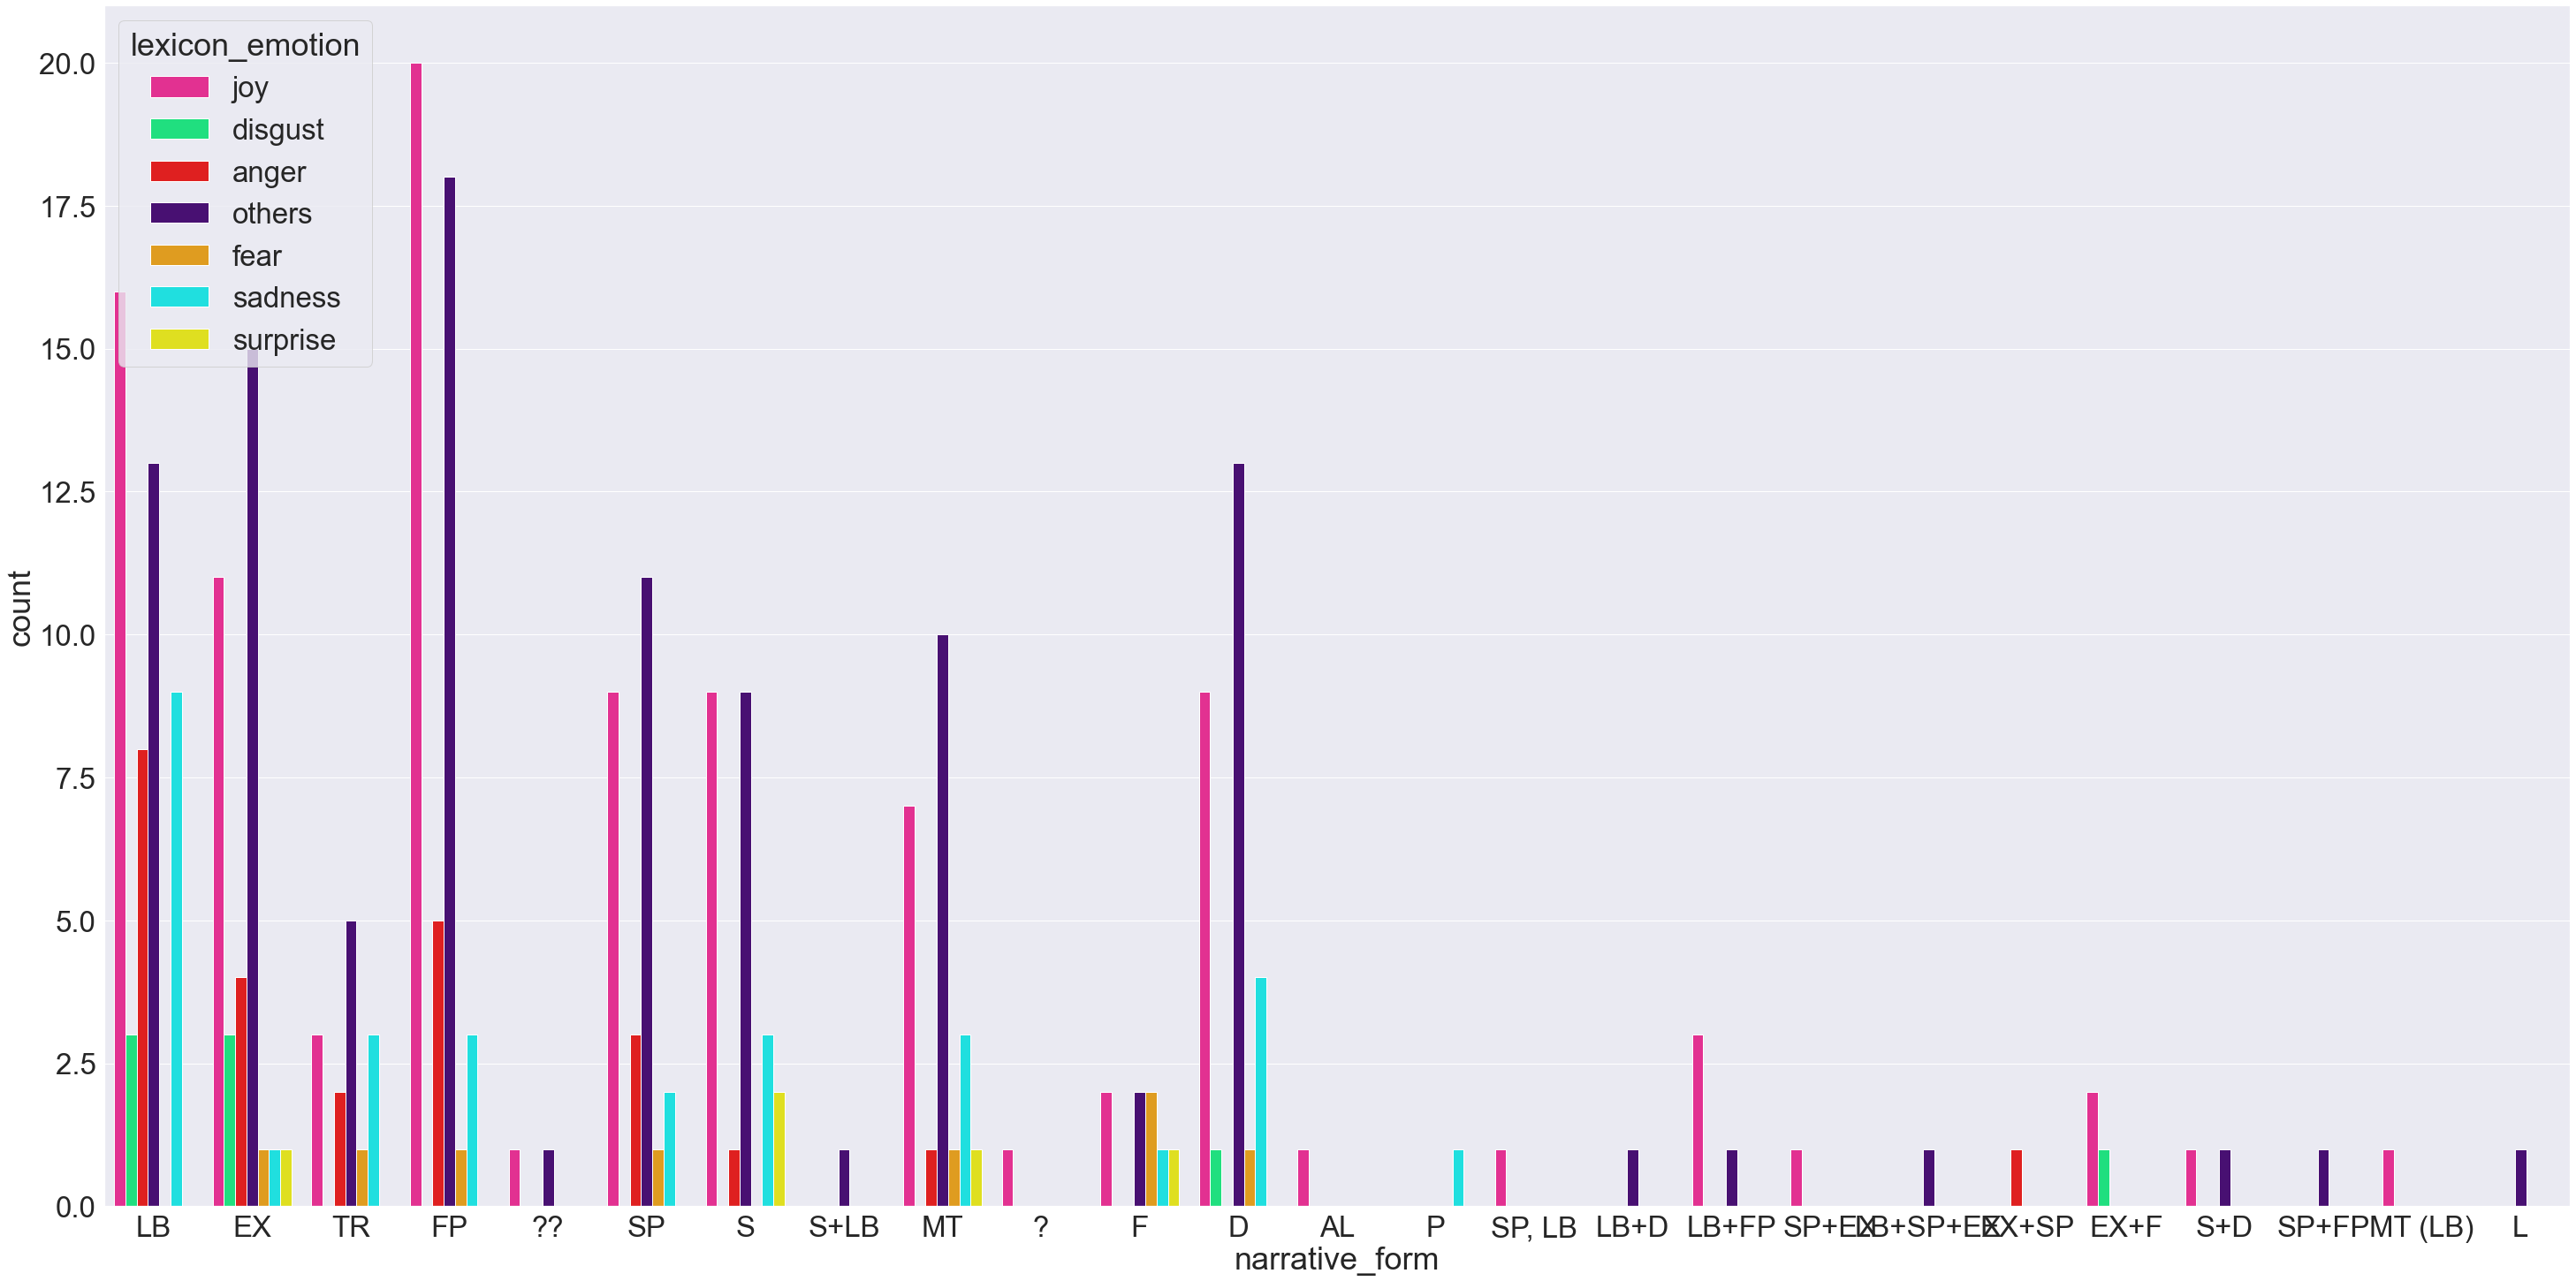

In [59]:
colors = {'joy':'deeppink', 'sadness':'aqua', 'disgust':'springgreen','anger':'red', 'fear':'orange', 'surprise':'yellow', 'others':'indigo'}

lexicon_emotion_score = sns.countplot(x='narrative_form',data=df, palette=colors,hue='lexicon_emotion')
fig = lexicon_emotion_score.get_figure()
fig.savefig("results/plots/spanish/lexicon_emotion_score.png")


## GPT

In [34]:
df_gpt = pd.read_pickle(r'new_sentences_gpt.pk')

In [35]:
df_gpt

,question_code,sentence,polarity_annotation,emotion_annotation,narrative_form,periodical_name,sentiment_pysentimiento,emotion_pysentimiento,nf_sentiment_lexicon_dispecs,nf_sentiment_lexicon_computational,nf_sentiment_lexicon_corrected,lexicon_emotion,manual_lexicon_sent_score,comp_lexicon_sent_score,corr_lexicon_sent_score,sentiment_py,emotion_py,GPT
0,G00Q136,"Miralos sin humanidad, y como esclavos, y ello...",NEG,no_agreement,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.887,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.000000,0.000000,0.000000,joy,NEU,NEU,NEU,NEG,anger,NEG
1,G00Q138,No es tan facil determinar por dónde se ha de ...,NEU,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.585,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,others,POS,POS,POS,NEG,others,NEU
2,G00Q139,"Tù debes acordarte de la ternura, con que se p...",POS,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.804,...","AnalyzerOutput(output=joy, probas={joy: 0.552,...",1.000000,1.000000,1.000000,joy,POS,POS,POS,POS,joy,POS
3,G00Q140,"Alli estarà mas tranquilo, y podrà vivir à su ...",POS,no_agreement,D,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.672,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,joy,POS,POS,POS,POS,others,POS
4,G00Q141,Confiesso à Vm. que yá no puedo sufrir la vida...,NEG,no_agreement,SP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.717,...","AnalyzerOutput(output=sadness, probas={sadness...",-0.333333,0.333333,-0.333333,sadness,NEG,POS,NEG,NEG,sadness,NEG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,G01Q58,Tiene un gabinete muy primoroso donde se retir...,no_agreement,no emotion,EX,1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-0...,"AnalyzerOutput(output=POS, probas={POS: 0.836,...","AnalyzerOutput(output=others, probas={others: ...",0.000000,0.000000,0.000000,others,NEU,NEU,NEU,POS,others,POS
225,G01Q70,"Pero en obsequio de la verdad debo decir, que ...",no_agreement,no emotion,MT,1803_El-Regañón-general_Anónimo-(Ventura-Ferr...,"AnalyzerOutput(output=NEU, probas={NEU: 0.626,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,sadness,POS,POS,POS,NEU,others,NEG
226,G01Q28,"Apostaré algo de bueno, à que algun artificio ...",no_agreement,no emotion,S,1781_El-Censor_Anonym-(García-de-Cañuelo-Luis+...,"AnalyzerOutput(output=NEG, probas={NEG: 0.722,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.600000,0.666667,0.600000,sadness,POS,POS,POS,NEG,anger,NEG
227,G00Q73,Mi amiga me ha dicho que Vm. no gusta de las M...,no_agreement,no emotion,LB,1786-1788_El-Corresponsal-del-Censor_Anónimo_V...,"AnalyzerOutput(output=NEG, probas={NEG: 0.653,...","AnalyzerOutput(output=sadness, probas={sadness...",0.333333,0.333333,0.333333,anger,POS,POS,POS,NEG,sadness,NEU


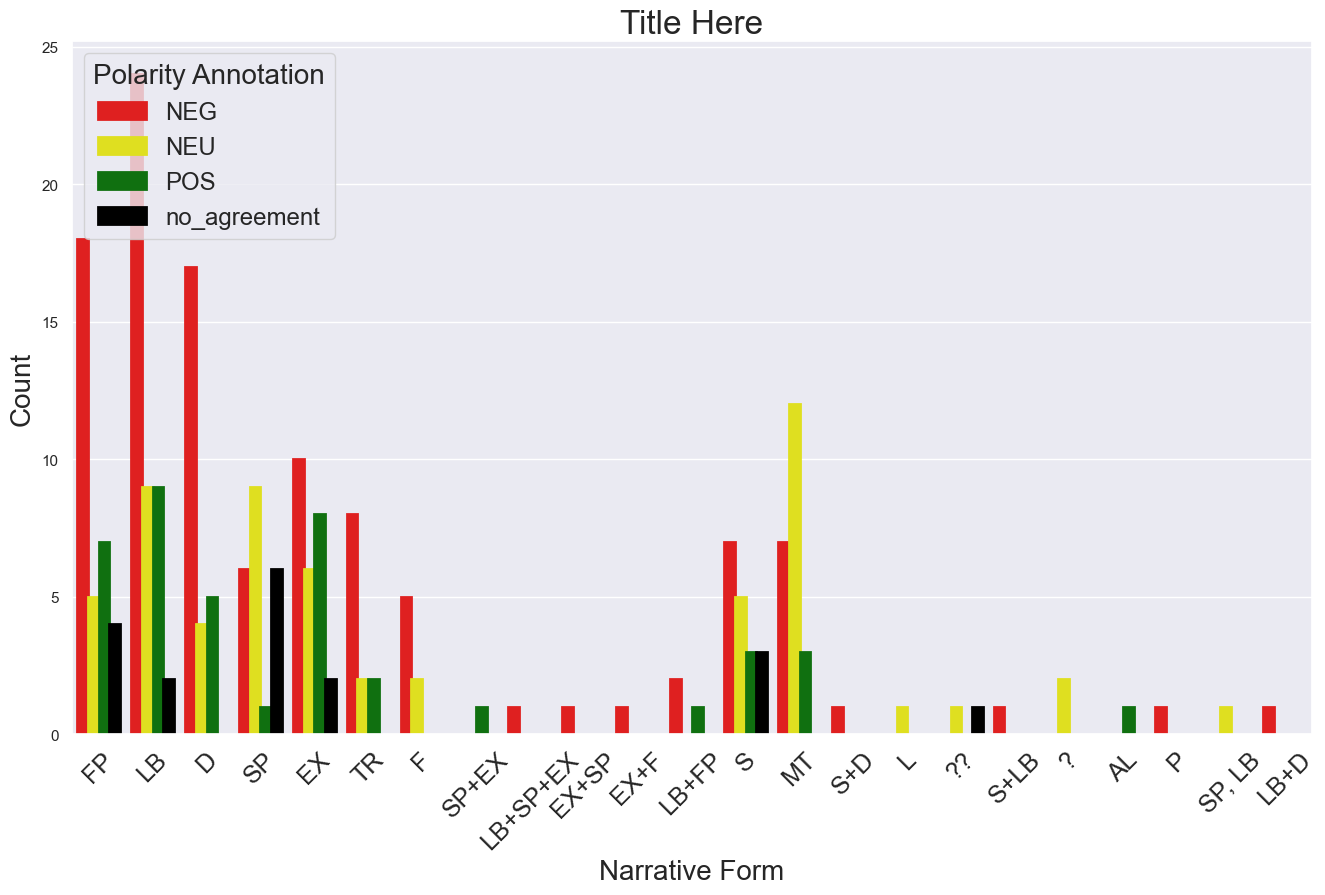

In [37]:
colors = {'POS':'green', 'NEU':'yellow', 'NEG':'red', 'no_agreement':'black'}

# Set the figure size to 16:9 aspect ratio
plt.figure(figsize=(16, 9))

sent_Score1 = sns.countplot(x=df_gpt['narrative_form'], 
                            palette=colors, 
                            hue=df_gpt['GPT'],
                            linewidth=2)

# Loop through bars and set edgecolor to be the same as facecolor
for patch in sent_Score1.patches:
    patch.set_edgecolor(patch.get_facecolor())

# Rotate x-axis labels and increase their font size
sent_Score1.set_xticklabels(sent_Score1.get_xticklabels(), rotation=45, fontsize=18)

# Increase the font size of axis labels and title
sent_Score1.set_xlabel('Narrative Form', fontsize=20)
sent_Score1.set_ylabel('Count', fontsize=20)
sent_Score1.set_title('Title Here', fontsize=24)

# Increase the size of the legend
plt.legend(title='Polarity Annotation', fontsize='x-large', title_fontsize='20')

fig = sent_Score1.get_figure()
fig.savefig("GPT.png")

